# PyEncharts

## 快速开始

### 安装

In [ ]:
pip install pyecharts

如果想直接将图片保存为 png, pdf, gif 格式的文件，可以使用 pyecharts-snapshot。使用该插件请确保你的系统上已经安装了 Nodejs 环境。
* 安装 phantomjs 
`npm install -g phantomjs-prebuilt`

* 安装 pyecharts-snapshot
`pip install pyecharts-snapshot`

源码安装
```
$ git clone https://github.com/pyecharts/pyecharts.git
$ cd pyecharts
$ pip install -r requirements.txt
$ python setup.py install
# 或者执行 python install.py
```

### 快速上手

#### 第一个图表

In [73]:
from pyecharts.charts import Bar

bar = Bar()
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
bar.add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
# render 会生成本地 HTML 文件，默认会在当前目录生成 render.html 文件
# 也可以传入路径参数，如 bar.render("mycharts.html")
# bar.render()
# bar.jupyter()

In [74]:
bar.render_notebook()

#### 使用 options 配置项，在 pyecharts 中，一切皆 Options

In [ ]:
from pyecharts.charts import Bar
from pyecharts import options as opts

# V1 版本开始支持链式调用
# 你所看到的格式其实是 `black` 格式化以后的效果
# 可以执行 `pip install black` 下载使用
bar = (
    Bar()
    .add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
    .add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
    .set_global_opts(title_opts=opts.TitleOpts(title="主标题", subtitle="副标题"))
    # 或者直接使用字典参数
    # .set_global_opts(title_opts={"text": "主标题", "subtext": "副标题"})
)
# bar.render()
bar.render_notebook()

# # 不习惯链式调用的开发者依旧可以单独调用方法
# bar = Bar()
# bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
# bar.add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
# bar.set_global_opts(title_opts=opts.TitleOpts(title="主标题", subtitle="副标题"))
# bar.render()

#### 渲染成图片文件，这部分内容请参考 进阶话题-渲染图片

In [ ]:
from pyecharts.charts import Bar
from pyecharts.render import make_snapshot

# 使用 snapshot-selenium 渲染图片
from snapshot_selenium import snapshot

bar = (
    Bar()
    .add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
    .add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
)
make_snapshot(snapshot, bar.render(), "bar.gif")

### 使用主题
pyecharts 提供了 10+ 种内置主题，开发者也可以定制自己喜欢的主题，进阶话题-[定制主题](https://pyecharts.org/#/zh-cn/themes) 有相关介绍。

**Note**: 在使用 Pandas&Numpy 时，请确保将数值类型转换为 python 原生的 int/float。比如整数类型请确保为 int，而不是 numpy.int32

In [ ]:
from pyecharts.charts import Bar
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
    .add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
    .add_yaxis("商家B", [15, 6, 45, 20, 35, 66])
    .set_global_opts(title_opts=opts.TitleOpts(title="主标题", subtitle="副标题"))
)
bar.render_notebook()

### 使用Notebook
[官方文档](https://pyecharts.org/#/zh-cn/notebook)    
不同的 Notebook 环境有自己不同的渲染要求，pyecharts 在底层做了适配处理，但因为我们无法在 import pyecharts 的时候知道用户具体使用的是哪种 Notebook 环境，所以需要用户在使用时在顶部声明环境类型。

#### Jupyter Notebook
Jupyter Notebook 直接调用 render_notebook 随时随地渲染图表，默认为 Jupter-Notebook。

#### Jupyter Lab
Jupyter Lab 渲染的时候有两点需要注意

1. 在顶部声明 Notebook 类型，必须在引入 pyecharts.charts 等模块前声明
```
 from pyecharts.globals import CurrentConfig, NotebookType
 CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
```
2. 第一次渲染的时候调用`load_javascript()`会预先加载基本`JavaScript`文件到`Notebook`中。如若后面其他图形渲染不出来，则请开发者尝试再次调用，因为`load_javascript`只会预先加载最基本的`js`引用。而主题、地图等`js`文件需要再次按需加载。
3. `load_javascript()`和`render_notebook()`方法需要在不同的`cell`中调用，这是`Notebook`的内联机制，其实本质上我们是返回了带有`_html_`,`_javascript_`对象的`class`。notebook 会自动去调用这些方法。

#### Nteract

#### Zeppelin

## 配置项

### 全局配置项

### 系列配置项

# Test Case

## 双轴图

In [66]:
from pyecharts.charts import Line, Bar
from pyecharts.render import make_snapshot
from pyecharts.globals import ThemeType,RenderType
from pyecharts.options.series_options import TextStyleOpts
from pyecharts.commons.utils import JsCode
from pyecharts import options as opts
# 使用 snapshot-selenium 渲染图片
from snapshot_selenium import snapshot

# attr = ["{}月".format(i) for i in range(1, 13)]
attr = ['2019/12/11','2019/12/16']
Inbox_Read = [2591, 2591]
Popup_Read = [2926, 3112]
# Url_Click = [5114]
Total_Sent = [3056, 3264]

newline = '\\n'

bar = (
    Bar(init_opts = opts.InitOpts(width = "1000px", 
                                  height = "600px", 
#                                   bg_color = "#ffffff",
                                  theme=ThemeType.VINTAGE, 
                                  renderer = RenderType.CANVAS, 
                                  animation_opts = opts.AnimationOpts(animation = True)
                                 )
       )
    .add_xaxis(attr)
    .add_yaxis("Inbox", Inbox_Read)
    .add_yaxis("Popup", Popup_Read)
#     .add_yaxis("Url_Click", Url_Click)
    .add_yaxis("Delivery", Total_Sent)
    .extend_axis(yaxis=opts.AxisOpts(type_ = 'value'
                                     ,boundary_gap = ['0%','20%']
                                     ,axislabel_opts = opts.LabelOpts(is_show = True,
                                                                      formatter = JsCode(f"function(value) \
                                                                      {{var str=Number(value/{Total_Sent}[0]*100).toFixed(1); str+='%'; return str;}}"))
                                    )
                 
    )
    .set_global_opts(title_opts = opts.TitleOpts(title = "SA Weekly ACL Poster sharing day", 
                                                 pos_left = 'center', 
                                                 pos_top = '1%',
                                                 title_textstyle_opts = {'fontWeight': 'bold',
                                                                         'fontSize': 16,
                                                                         'padding': [8,8,8,8],
                                                                         'hight': '10%',
                                                                         'line_height':'10%'
                                                                      })
                     ,legend_opts = opts.LegendOpts(type_ = 'scroll', 
                                                    is_show = True,
                                                    pos_left = 'center', 
                                                    pos_top = 'bottom', 
                                                    orient = 'horizontal', 
                                                   )
                     ,xaxis_opts = opts.AxisOpts(type_ = None, 
                                                 boundary_gap = ['10%','10%']
                                                )
                     ,toolbox_opts = opts.ToolboxOpts(is_show = True)
                     ,tooltip_opts = opts.TooltipOpts(is_show = True)
                     ,datazoom_opts = opts.DataZoomOpts(is_show = True
                                                        ,type_ = "slider"
                                                        ,orient = "vertical"
                                                        ,range_start = 0
                                                        ,range_end = 100
                                                        ,yaxis_index = 1
                                                       )
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show = True,
                                               position = "insideBottom",
                                               font_style = "normal",
                                               font_size = 15,
                                               margin = 100,
                                               rotate = 0,
                                               interval = 1,
                                               formatter = JsCode(f"function(params){{ \
                                               var str1=params.seriesName + '_Num' + ':' + params.value; \
                                               return str1 }}"),
                                               rich = { 'lineHeight':10
                                               }
                                              )
                    )
)

line = (
    Line()
    .add_xaxis(attr)
    .add_yaxis("Inbox", Inbox_Read, yaxis_index = 1)
    .add_yaxis("Popup", Popup_Read, yaxis_index = 1)
#     .add_yaxis("Url_Click", Url_Click, yaxis_index = 1)
    .add_yaxis("Delivery", Total_Sent, yaxis_index = 1)
    .set_series_opts(label_opts=opts.LabelOpts(is_show = True,
#                                                font_style="italic",
                                               font_size = 15,
                                               color = "#333333",
                                               interval = 6, 
                                               margin = 100,
                                               formatter = JsCode(f"function(params){{ \
                                               var str1 = params.seriesName + '_Rate' + ':' + Number(params.value[1]/params.value[3]*100).toFixed(2) + '%'; \
                                               return str1}}"),
                                               rich = {
                                                   'lineHeight':10
                                               }
                                              )
                    )
)

bar.overlap(line)
bar.render_notebook()
# bar.render()
make_snapshot(snapshot, bar.render(), "bar.gif")

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 79


## GetData

### TODO:
1. 输入Campaign cd | Communication cd 获取结果
2. 可以限制 Trigger 时间，StartTime , EndTime
3. 可以支持多个查询
4. 输出模式可选 ByDay, TillNow, ByGroup
5. 是否检查UrlClick [SMT，Wechat 可选]
6. 选择输出字段[可选]

#### Old version

##### Scripts

In [1]:
import sys,os, traceback
import cx_Oracle
import datetime, time
import pandas as pd

BASE_DIR = r'C:\Users\leo.zhangzs\AppData\Roaming\Code\User\VScode\py3\UAT_Test'
sys.path.append(BASE_DIR)

from core import configadmin,log_ctrl,color_me
config_path = os.path.join(BASE_DIR, 'conf')
config_name = 'setting.ini'
d_set = configadmin.ConfigAdmin(config_path, config_name)
logging = log_ctrl.de8ug_log(logger_name='camp_res', log_file=os.path.join(BASE_DIR, 'log', f'{time.strftime("%Y%m",time.localtime())}-debug.log'))
                                                                           
class campaign_res:
    def __init__(self, campaign_cd, communication_cd, url_check, launch_time, End_time=None, model='t', group=None):
        """
        计算Read Rate (排除Remove，Control Group)
        campaign_cd:当campaign_cd不为空("XNA")且communication_cd为空("XNA")时，计算该campaign下，launch_time之后所有communication阅读率(不按人消重计算)。
        communication_cd:当Communication_cd不为空时，优先按Communication_cd计算Read Rate(按人消重计算).当Campaign_cd & Communication_cd 同时不为空时(不按人消重计算)
        url_check:是否检查连接点击率(SMT, Wechat适用)
        launch_time:检查首次Campaign起始时间
        End_time:检查第n次Campagin起始时间(默认为空)
        model:
            -t —— Till Now(默认)
            -l —— By Launch Time
            -d —— By day
            -g —— By Group:适用该分组功能时，communication_cd不能为空，且数量必须与group一致，中间适用空格分隔
        """
        self.campaign_cd = campaign_cd if len(campaign_cd) > 3 else None
        self.communication_cd = str(communication_cd).replace(' ',"','") if len(communication_cd) > 4 else None
        self.url_check = url_check
        self.launch_time = launch_time
        self.End_time = End_time
        self.model = model
        self.user = d_set.read_config("SAS_db", "user")
        self.password = d_set.read_config("SAS_db", "password")
        self.service = d_set.read_config("SAS_db", "service")
        if model == 'g': 
            if group != None and self.communication_cd != None:
                self.group = {'COMMUNICATION_CD':communication_cd.split(" "),'GROUP_TYPE':group.split(" ")}
            else:
                logging.error('Parameter error: Check your group condition!!!')
                raise ValueException("Parameter error: Check your group condition!!!")

    def get_res(self):
        try:
            self.db = cx_Oracle.connect(self.user, self.password, self.service)
            self.con = self.db.cursor()
            if self.communication_cd:
                self.con1 = f"GE.COMMUNICATION_CD IN ('{self.communication_cd}')"
                if self.campaign_cd:
                    self.con1 = self.con1 + f" AND GE.CAMPAIGN_CD = '{self.campaign_cd}'"
            else:
                self.con1 = f"GE.CAMPAIGN_CD = '{self.campaign_cd}'"
                                                                           
            if self.End_time:
                self.con2 = f"GE.PROCESSED_DTTM > TO_DATE('{self.launch_time}', 'yyyy-mm-dd hh24:mi:ss') AND GE.PROCESSED_DTTM < TO_DATE('{self.End_time}', 'yyyy-mm-dd hh24:mi:ss')"
            else:
                self.con2 = f"GE.PROCESSED_DTTM > TO_DATE('{self.launch_time}', 'yyyy-mm-dd hh24:mi:ss')"
            
            oo = f"SELECT GE.RESPONSE_TRACKING_CD,\
            GE.CAMPAIGN_CD,\
            GE.CAMPAIGN_NM,\
            GE.COMMUNICATION_CD,\
            GE.COMMUNICATION_NM,\
            GE.COMMUNICATION_OCCURRENCE_NO,\
            GE.CHANNEL_CD,\
            GE.SUBJECT_TYPE_NM,\
            TRUNC(GE.PROCESSED_DTTM) AS PROCESSED_DTTM\
            FROM APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE\
            WHERE {self.con1}\
            AND {self.con2}\
            AND GE.CONTROL_GROUP_TYPE_CD IS NULL\
            AND GE.CHANNEL_CD != '_MC'\
            ORDER BY GE.PROCESSED_DTTM"
            
            col = ['RESPONSE_TRACKING_CD','CAMPAIGN_CD','CAMPAIGN_NM','COMMUNICATION_CD','COMMUNICATION_NM','COMMUNICATION_OCCURRENCE_NO','CHANNEL_CD','SUBJECT_TYPE_NM','PROCESSED_DTTM']
            rows = self._excute_sql(oo)

            if len(rows) < 1:
                print(oo)
                logging.info('None Results')
                return False
            
            df1 = pd.DataFrame(data=rows, index=[i[0] for i in rows], columns=col)
            self._a = "="
            if self.model == 't':
                df = df1.drop_duplicates(subset=['CAMPAIGN_CD','CHANNEL_CD'], keep='first')
                self._a = ">="
                self._b = self.con1
            elif self.model == 'l' or self.model == 'd':
                df = df1.sort_index()
            elif self.model == 'g':
                if len(self.group["COMMUNICATION_CD"]) == len(self.group["GROUP_TYPE"]):
                    df2 = pd.DataFrame(data=self.group["GROUP_TYPE"], index=self.group["COMMUNICATION_CD"], columns=['GROUP_TYPE'])
                    df1 = df1.set_index([df1.COMMUNICATION_CD])
                    df = pd.concat([df1, df2], axis=1, join='inner')
                else:
                    logging.error('Group Data not matched!')
                    return False
            else:
                logging.error('Parameter error: No such group type!')
                return False
                                                                           
            num = 0
            dic = {}
            for i in ['SMT', 'GEN', "SMS", 'WCH', 'RPT']:
                if len(df)==num:
                    break
                else:
                    num += len(df.loc[df.CHANNEL_CD==i])
                    dic[i] = self.channel_response(df.loc[df.CHANNEL_CD==i], i)
                                                                           
            self.db.close()
            return dic
        except Exception as e:
            logging.error(traceback.format_exc())

    def notify_type(self, COMMUNICATION_CD, CHANNEL_CD, OCCURRENCE_NO, PROCESSED_DTTM):
        try:
            if type(COMMUNICATION_CD) != str:
                COMMUNICATION_CD = COMMUNICATION_CD.iloc[0]
        except Exception as e:
            print(type(COMMUNICATION_CD), COMMUNICATION_CD)
            return None
                                                                           
        if self.model != 't':
            self._b = f"GE.COMMUNICATION_CD = '{COMMUNICATION_CD}'"
                                                                           
        if CHANNEL_CD == 'SMT':
            sql = f"select distinct case when tem.is_popup > 0 then 'POP_UP'  when  tem.is_notify > 0 then 'PUSH' end as Notify_type \
            from app_campaign_cdm.ci_cell_package ge \
            left join OWNER_OUT.OT_SMT_MESSAGE_DATA TA \
            on ta.campaign_track_id = ge.response_tracking_cd \
            left join dm_campaign.v_smt_template tem \
            on ta.template_id = tem.id \
            WHERE {self._b} AND ge.COMMUNICATION_OCCURRENCE_NO {self._a} {OCCURRENCE_NO}\
            AND {self.con2} AND ge.control_group_type_cd is null\
            AND ge.channel_cd != '_MC'"
        res = self._excute_sql(sql)[0][0]
        if res:
            return res
        else:
            print(sql)
            return None

    def owner_cnt(self, COMMUNICATION_CD, CHANNEL_CD, OCCURRENCE_NO, PROCESSED_DTTM):
        if type(COMMUNICATION_CD) != str:
            COMMUNICATION_CD = COMMUNICATION_CD.iloc[0]
        
        if CHANNEL_CD == "SMT":
            oo_tb = "OT_SMT_MESSAGE_DATA"
            remove_tb = "LEFT JOIN OWNER_OUT.OT_SMT_FORCED_DELETION RE ON RE.CAMPAIGN_TRACKID_FD = TA.CAMPAIGN_TRACK_ID AND RE.ID_ENTITY_EMPLOYEE = TA.ID_ENTITY_EMPLOYEE"
            remove_con = "AND RE.ID_ENTITY_EMPLOYEE IS NULL"
        
        if self.model != 't':
            self._b = f"GE.COMMUNICATION_CD = '{COMMUNICATION_CD}'"
        
        sql = f"SELECT COUNT(TA.ID_ENTITY_EMPLOYEE) AS OWNER_OUT\
            FROM OWNER_OUT.{oo_tb} TA\
            LEFT JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE\
            ON GE.RESPONSE_TRACKING_CD = TA.CAMPAIGN_TRACK_ID\
            {remove_tb}\
            WHERE {self._b}\
            and GE.Communication_Occurrence_No {self._a} {OCCURRENCE_NO}\
            and ge.control_group_type_cd is null \
            AND ge.deleted_flg = 'N' \
            AND ge.channel_cd != '_MC'\
            AND TA.ACTIVE_START >= TO_DATE('{PROCESSED_DTTM}','yyyy-mm-dd hh24:mi:ss')\
            {remove_con}"
        res = self._excute_sql(sql)[0][0]
        if res:
            return res
        else:
            print(sql)
            return None

    def contact_cnt(self, COMMUNICATION_CD, SUBJECT_TYPE_NM, OCCURRENCE_NO, PROCESSED_DTTM):
        if type(COMMUNICATION_CD) != str:
            COMMUNICATION_CD = COMMUNICATION_CD.iloc[0]
        
        a = lambda x: "TIP" if x == "Tipper" else "EMP"
        if self.model != 't':
            self._b = f"GE.COMMUNICATION_CD = '{COMMUNICATION_CD}'"
        
        sql = f"SELECT COUNT(HMP.ID_XRM_EMPLOYEE) AS DELIVERY_SUC\
            FROM APP_CAMPAIGN_CDM.CI_CONTACT_HISTORY_{a(SUBJECT_TYPE_NM)} HMP\
            JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE\
            ON GE.CELL_PACKAGE_SK = HMP.CELL_PACKAGE_SK\
            WHERE {self._b}\
            AND HMP.CONTACT_HISTORY_STATUS_CD <> '_30'\
            AND HMP.CONTACT_HISTORY_STATUS_CD <> '_31'\
            AND ge.COMMUNICATION_OCCURRENCE_NO {self._a} {OCCURRENCE_NO}\
            and ge.control_group_type_cd is null \
            AND ge.deleted_flg = 'N' \
            AND ge.channel_cd != '_MC'\
            AND GE.PROCESSED_DTTM >= TO_DATE('{PROCESSED_DTTM}', 'yyyy-mm-dd hh24:mi:ss')"
        res = self._excute_sql(sql)[0][0]
        print(sql)
        if res:
            return res
        else:
            print(sql)
            return None

    def channel_response(self, df, channel):
        if channel == "SMT":
            data = df.copy()
            data['Notify_Type'] = df.apply(lambda x: self.notify_type(x['COMMUNICATION_CD'], x['CHANNEL_CD'], x['COMMUNICATION_OCCURRENCE_NO'], x['PROCESSED_DTTM']), axis=1)
            data['Total_Send'] = df.apply(lambda x: self.owner_cnt(x['COMMUNICATION_CD'], x['CHANNEL_CD'], x['COMMUNICATION_OCCURRENCE_NO'], x['PROCESSED_DTTM']), axis=1)
            data['Send_Succ'] = df.apply(lambda x: self.contact_cnt(x['COMMUNICATION_CD'], x['SUBJECT_TYPE_NM'], x['COMMUNICATION_OCCURRENCE_NO'], x['PROCESSED_DTTM']), axis=1)
            data['Delivery_Rate'] = data.apply(lambda x: x['Send_Succ']/x['Total_Send'], axis=1)
            data['Inbox_Read'] = df.apply(lambda x: self.inbox_cnt(x['COMMUNICATION_CD'], x['CHANNEL_CD'], x['SUBJECT_TYPE_NM'], x['COMMUNICATION_OCCURRENCE_NO'], x['PROCESSED_DTTM']), axis=1)
            data['Inbox_Rate'] = data.apply(lambda x: x['Inbox_Read']/x['Send_Succ'], axis=1)
            if len(data.loc[data.Notify_Type=='POP_UP']) > 0:
                data['Popup_Read'] = data.loc[data.Notify_Type=='POP_UP'].apply(lambda x: self.popup_cnt(x['COMMUNICATION_CD'], x['CHANNEL_CD'], x['SUBJECT_TYPE_NM'], x['COMMUNICATION_OCCURRENCE_NO'], x['PROCESSED_DTTM']), axis=1)
                data['Popup_Rate'] = data.apply(lambda x: x['Popup_Read']/x['Send_Succ'], axis=1)
            if len(data.loc[data.Notify_Type=='PUSH']) > 0:
                data['Push_Read'] = data.loc[data.Notify_Type=='PUSH'].apply(lambda x: self.popup_cnt(x['COMMUNICATION_CD'], x['CHANNEL_CD'], x['SUBJECT_TYPE_NM'], x['COMMUNICATION_OCCURRENCE_NO'], x['PROCESSED_DTTM']), axis=1)
                data['Push_Rate'] = data.apply(lambda x: x['Push_Read']/x['Send_Succ'], axis=1)
            if self.url_check == 'a':
                data["Url_Click"] = df.apply(lambda x: self.url_click(x['COMMUNICATION_CD'], x['CHANNEL_CD'], x['SUBJECT_TYPE_NM'], x['COMMUNICATION_OCCURRENCE_NO'], x['PROCESSED_DTTM']), axis=1)
                data['Click_Rate'] = data.apply(lambda x: x['Url_Click']/x['Send_Succ'], axis=1)
            return data
    
    def inbox_cnt(self, COMMUNICATION_CD, CHANNEL_CD, SUBJECT_TYPE_NM, OCCURRENCE_NO, PROCESSED_DTTM):
        if type(COMMUNICATION_CD) != str:
            COMMUNICATION_CD = COMMUNICATION_CD.iloc[0]
        
        a = lambda x: "TIP" if x == "Tipper" else "EMP"
        
        if self.model != 't':
            self._b = f"GE.COMMUNICATION_CD = '{COMMUNICATION_CD}'"
                                                                           
        sql = f"SELECT COUNT(DIstinct hmp.id_xrm_employee) as POPUP_READ\
            FROM APP_CAMPAIGN_CDM.CI_RESPONSE_HISTORY_{a(SUBJECT_TYPE_NM)} HMP\
            JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE\
            ON GE.CELL_PACKAGE_SK = HMP.CELL_PACKAGE_SK\
            WHERE {self._b}\
            AND HMP.RESPONSE_SK IN ('1029', '1030')\
            AND ge.communication_occurrence_no {self._a} {OCCURRENCE_NO}\
            and ge.control_group_type_cd is null\
            AND ge.deleted_flg = 'N' \
            AND ge.channel_cd != '_MC'\
            AND {self.con2}\
            AND HMP.ID_XRM_EMPLOYEE NOT IN ({self._remove_tb(CHANNEL_CD)}\
            LEFT JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE \
            ON GE.RESPONSE_TRACKING_CD = A.CAMPAIGN_TRACKID_FD \
            WHERE {self._b} AND ge.COMMUNICATION_OCCURRENCE_NO {self._a} {OCCURRENCE_NO}\
            AND {self.con2}\
            AND GE.CONTROL_GROUP_TYPE_CD IS NULL)"
        res = self._excute_sql(sql)[0][0]
        print(sql)
        if res:
            print(sql)
            return res
        else:
            print(sql)
            return None
                                                                           
    def popup_cnt(self, COMMUNICATION_CD, CHANNEL_CD, SUBJECT_TYPE_NM, OCCURRENCE_NO, PROCESSED_DTTM):
        if type(COMMUNICATION_CD) != str:
            COMMUNICATION_CD = COMMUNICATION_CD.iloc[0]
        
        a = lambda x: "TIP" if x == "Tipper" else "EMP"
        
        if self.model != 't':
            self._b = f"GE.COMMUNICATION_CD = '{COMMUNICATION_CD}'"
                                                                           
        sql = f"SELECT COUNT(distinct hmp.id_xrm_employee) as POPUP_READ\
            FROM APP_CAMPAIGN_CDM.CI_RESPONSE_HISTORY_{a(SUBJECT_TYPE_NM)} HMP\
            JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE\
            ON GE.CELL_PACKAGE_SK = HMP.CELL_PACKAGE_SK\
            WHERE {self._b}\
            AND HMP.RESPONSE_SK = '1028'\
            AND ge.communication_occurrence_no {self._a} {OCCURRENCE_NO}\
            and ge.control_group_type_cd is null\
            AND ge.deleted_flg = 'N' \
            AND ge.channel_cd != '_MC'\
            AND {self.con2}\
            AND HMP.ID_XRM_EMPLOYEE NOT IN ({self._remove_tb(CHANNEL_CD)}\
            LEFT JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE \
            ON GE.RESPONSE_TRACKING_CD = A.CAMPAIGN_TRACKID_FD \
            WHERE {self._b} AND ge.COMMUNICATION_OCCURRENCE_NO {self._a} {OCCURRENCE_NO}\
            AND {self.con2}\
            AND GE.CONTROL_GROUP_TYPE_CD IS NULL)"
#         
        return self._excute_sql(sql)[0][0]

    def push_cnt(self, COMMUNICATION_CD, CHANNEL_CD, SUBJECT_TYPE_NM, OCCURRENCE_NO, PROCESSED_DTTM):
        if type(COMMUNICATION_CD) != str:
            COMMUNICATION_CD = COMMUNICATION_CD.iloc[0]
        
        a = lambda x: "TIP" if x == "Tipper" else "EMP"
        
        if self.model != 't':
            self._b = f"GE.COMMUNICATION_CD = '{COMMUNICATION_CD}'"
                                                                           
        sql = f"SELECT COUNT(distinct hmp.id_xrm_employee) as POPUP_READ\
            FROM APP_CAMPAIGN_CDM.CI_RESPONSE_HISTORY_{a(SUBJECT_TYPE_NM)} HMP\
            JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE\
            ON GE.CELL_PACKAGE_SK = HMP.CELL_PACKAGE_SK\
            WHERE {self._b}\
            AND HMP.RESPONSE_SK = '1031'\
            AND ge.communication_occurrence_no {self._a} {OCCURRENCE_NO}\
            and ge.control_group_type_cd is null\
            AND ge.deleted_flg = 'N' \
            AND ge.channel_cd != '_MC'\
            AND {self.con2}\
            AND HMP.ID_XRM_EMPLOYEE NOT IN ({self._remove_tb(CHANNEL_CD)}\
            LEFT JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE \
            ON GE.RESPONSE_TRACKING_CD = A.CAMPAIGN_TRACKID_FD \
            WHERE {self._b} AND ge.COMMUNICATION_OCCURRENCE_NO {self._a} {OCCURRENCE_NO}\
            AND {self.con2}\
            AND GE.CONTROL_GROUP_TYPE_CD IS NULL)"
        
            
        return self._excute_sql(sql)[0][0]

    def url_click(self, COMMUNICATION_CD, CHANNEL_CD, SUBJECT_TYPE_NM, OCCURRENCE_NO, PROCESSED_DTTM):
        if type(COMMUNICATION_CD) != str:
            COMMUNICATION_CD = COMMUNICATION_CD.iloc[0]
        
        a = lambda x: "TIP" if x == "Tipper" else "EMP"
        
        if self.model != 't':
            self._b = f"GE.COMMUNICATION_CD = '{COMMUNICATION_CD}'"
                                                                           
        sql = f"SELECT COUNT(distinct HMP.Id_Xrm_Employee) AS URL_CLICK\
            FROM APP_CAMPAIGN_CDM.CI_RESPONSE_HISTORY_{a(SUBJECT_TYPE_NM)} HMP\
            LEFT JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE\
            ON HMP.CELL_PACKAGE_SK = GE.CELL_PACKAGE_SK\
            WHERE {self._b} AND {self.con2}\
            AND ge.communication_occurrence_no {self._a} {OCCURRENCE_NO}\
            AND HMP.External_Response_Info_Id2 is not null\
            and ge.control_group_type_cd is null\
            AND ge.deleted_flg = 'N' \
            AND ge.channel_cd != '_MC'\
            AND HMP.ID_XRM_EMPLOYEE NOT IN ({self._remove_tb(CHANNEL_CD)}\
            LEFT JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE \
            ON GE.RESPONSE_TRACKING_CD = A.CAMPAIGN_TRACKID_FD \
            WHERE {self._b} AND ge.COMMUNICATION_OCCURRENCE_NO {self._a} {OCCURRENCE_NO}\
            AND {self.con2}\
            AND GE.CONTROL_GROUP_TYPE_CD IS NULL)\
            ORDER BY GE.COMMUNICATION_CD"
            
        return self._excute_sql(sql)[0][0]
                                                                           
    def _remove_tb(self, channel_cd):
        if channel_cd == "SMT":
            remove_con_his ="SELECT A.ID_ENTITY_EMPLOYEE_TYPE || '.' || A.ID_ENTITY_EMPLOYEE \
                FROM OWNER_OUT.OT_SMT_FORCED_DELETION A"
            return remove_con_his
        else:
            return False
    
    def _excute_sql(self, sql):
        try:
            self.con.execute(sql)
            rows = self.con.fetchall()
            return rows
        except Exception as e:
            print(e)
            print(sql)

##### Test

In [2]:
# CAMP1122 COMM4073 CAMP1435 COMM6028 COMM6211 COMM6395
campaign_cd = 'XNA'
COMMUNICATION_CD = 'COMM7385'
LAUNCH_TIME = '2020/02/11 00:00:00'
# END_TIME = '2019/12/17 17:00:00'
END_TIME = None
URL_CHICK = 'n'
MODEL = 'd'
GROUP = 'P1 P2'
test = campaign_res(campaign_cd, COMMUNICATION_CD, URL_CHICK, LAUNCH_TIME, END_TIME, MODEL, GROUP)
# data = test.get_res()

In [3]:
data = test.get_res()

SELECT COUNT(HMP.ID_XRM_EMPLOYEE) AS DELIVERY_SUC            FROM APP_CAMPAIGN_CDM.CI_CONTACT_HISTORY_EMP HMP            JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE            ON GE.CELL_PACKAGE_SK = HMP.CELL_PACKAGE_SK            WHERE GE.COMMUNICATION_CD = 'COMM7385'            AND HMP.CONTACT_HISTORY_STATUS_CD <> '_30'            AND HMP.CONTACT_HISTORY_STATUS_CD <> '_31'            AND ge.COMMUNICATION_OCCURRENCE_NO = 1            and ge.control_group_type_cd is null             AND ge.deleted_flg = 'N'             AND ge.channel_cd != '_MC'            AND GE.PROCESSED_DTTM >= TO_DATE('2020-02-11 00:00:00', 'yyyy-mm-dd hh24:mi:ss')
SELECT COUNT(DIstinct hmp.id_xrm_employee) as POPUP_READ            FROM APP_CAMPAIGN_CDM.CI_RESPONSE_HISTORY_EMP HMP            JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE            ON GE.CELL_PACKAGE_SK = HMP.CELL_PACKAGE_SK            WHERE GE.COMMUNICATION_CD = 'COMM7385'            AND HMP.RESPONSE_SK IN ('1029', '1030')            AND ge.communication_o

In [78]:
df = data['SMT']
cols = list(df.columns[8:])
m = cols[1]
# if m == 'GROUP_TYPE'
# df=df.fillna(0)
df

,RESPONSE_TRACKING_CD,CAMPAIGN_CD,CAMPAIGN_NM,COMMUNICATION_CD,COMMUNICATION_NM,COMMUNICATION_OCCURRENCE_NO,CHANNEL_CD,SUBJECT_TYPE_NM,PROCESSED_DTTM,Notify_Type,Total_Send,Send_Succ,Delivery_Rate,Inbox_Read,Inbox_Rate,Popup_Read,Popup_Rate
226440103,226440103,CAMP1491,SMT_Collect_BlessWords_Game_Tipper_SCR-981,COMM6782,Tipper_Bless_Word_Game_SCR981-7327-0107,1,SMT,Tipper,2020-01-07,POP_UP,643988,643988,1.0,7590,0.011786,62213,0.096606
226930103,226930103,CAMP1491,SMT_Collect_BlessWords_Game_Tipper_SCR-981,COMM6783,Tipper_Bless_Word_Game_SCR981-7326-0109,1,SMT,Tipper,2020-01-09,POP_UP,644280,644280,1.0,5272,0.008183,51048,0.079233
228100103,228100103,CAMP1491,SMT_Collect_BlessWords_Game_Tipper_SCR-981,COMM6785,Tipper_Bless_Word_Game_SCR981-7325-0113,1,SMT,Tipper,2020-01-13,POP_UP,644531,644531,1.0,82,0.000127,762,0.001182


In [55]:
# data['SMT']['CAMPAIGN_NM'][0]
# drep

In [69]:
drep = data['SMT'][cols].to_dict("list")
print([k for k,v in drep.items()])

['PROCESSED_DTTM', 'Notify_Type', 'Total_Send', 'Send_Succ', 'Delivery_Rate', 'Inbox_Read', 'Inbox_Rate', 'Popup_Read', 'Popup_Rate']


In [70]:
# ToHtml
a = lambda x: format(x, '.2%')
pd.set_option('display.width', 1000)
pd.set_option('colheader_justify', 'center')
tb = data['SMT'].to_html(columns=cols, float_format=a, index=0, border=0)
# print(tb)

#### New version

In [5]:
import sys
import os
import traceback
import datetime
import time
import cx_Oracle
import pandas as pd

from pandas import DataFrame,Series


BASE_DIR = r'C:\Users\leo.zhangzs\AppData\Roaming\Code\User\VScode\py3\schedule_monitor'
sys.path.append(BASE_DIR)

from core import configadmin,log_ctrl,color_me

config_path = os.path.join(BASE_DIR, 'conf')
config_name = 'setting.ini'
d_set = configadmin.ConfigAdmin(config_path, config_name)

class getData(object):
    def __init__(self, communicationCD, CheckDTime):
        self.user = d_set.read_config("SAS_db", "user")
        self.password = d_set.read_config("SAS_db", "password")
        self.service = d_set.read_config("SAS_db", "service")
        self.db = cx_Oracle.connect(self.user, self.password, self.service)
        self.con = self.db.cursor()
        self.communicationCD = communicationCD
        self.CheckDTime = CheckDTime
        
    def get_res(self):
        sql = f"""with owner_out as (SELECT ge.response_tracking_cd,
               trunc(ge.processed_dttm) MD,
               COUNT(DISTINCT TA.ID_ENTITY_EMPLOYEE) AS OWNER_OUT
          FROM OWNER_OUT.OT_SMT_MESSAGE_DATA TA
          LEFT JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE
            ON GE.RESPONSE_TRACKING_CD = TA.CAMPAIGN_TRACK_ID
         WHERE GE.COMMUNICATION_CD IN ('{self.communicationCD}')
           and ge.control_group_type_cd is null
           AND GE.PROCESSED_DTTM >=
               TO_DATE('{self.CheckDTime}', 'yyyy-mm-dd hh24:mi:ss')
         group by ge.response_tracking_cd, trunc(ge.processed_dttm)
         order by trunc(ge.processed_dttm)),
         inbox as (SELECT ge.response_tracking_cd,
               trunc(ge.processed_dttm) MD,
               COUNT(DIstinct hmp.id_xrm_employee) as INBOX_READ
          FROM APP_CAMPAIGN_CDM.CI_RESPONSE_HISTORY_EMP HMP
          JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE
            ON GE.CELL_PACKAGE_SK = HMP.CELL_PACKAGE_SK
         WHERE GE.COMMUNICATION_CD = '{self.communicationCD}'
           AND HMP.RESPONSE_SK IN ('1029', '1030')
           and ge.control_group_type_cd is null
           AND GE.PROCESSED_DTTM >=
               TO_DATE('{self.CheckDTime}', 'yyyy-mm-dd hh24:mi:ss')
         group by ge.response_tracking_cd, trunc(ge.processed_dttm)
         order by trunc(ge.processed_dttm)),
        popup as (SELECT ge.response_tracking_cd,
               trunc(ge.processed_dttm) MD,
               COUNT(DIstinct hmp.id_xrm_employee) as POPUP_READ
          FROM APP_CAMPAIGN_CDM.CI_RESPONSE_HISTORY_EMP HMP
          JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE
            ON GE.CELL_PACKAGE_SK = HMP.CELL_PACKAGE_SK
         WHERE GE.COMMUNICATION_CD = '{self.communicationCD}'
           AND HMP.RESPONSE_SK = '1028'
           and ge.control_group_type_cd is null
           AND GE.PROCESSED_DTTM >=
               TO_DATE('{self.CheckDTime}', 'yyyy-mm-dd hh24:mi:ss')
         group by ge.response_tracking_cd, trunc(ge.processed_dttm)
         order by trunc(ge.processed_dttm)),
        urlclick as (SELECT ge.response_tracking_cd,
               trunc(ge.processed_dttm) MD,
               COUNT(distinct EMP.Id_Xrm_Employee) AS URL_CLICK
          FROM APP_CAMPAIGN_CDM.CI_RESPONSE_HISTORY_EMP EMP
          LEFT JOIN APP_CAMPAIGN_CDM.CI_CELL_PACKAGE GE
            ON EMP.CELL_PACKAGE_SK = GE.CELL_PACKAGE_SK
         WHERE GE.COMMUNICATION_CD = '{self.communicationCD}'
           AND GE.PROCESSED_DTTM >
               TO_DATE('{self.CheckDTime}', 'yyyy-mm-dd hh24:mi:ss')
           AND EMP.External_Response_Info_Id2 is not null
           and ge.control_group_type_cd is null
         group by ge.response_tracking_cd, trunc(ge.processed_dttm)
         ORDER BY trunc(ge.processed_dttm))
        select to_char(owner_out.MD,'YYYY-MM-DD') MD,
               owner_out.owner_out,
               inbox.INBOX_READ,
               Round(inbox.INBOX_READ / owner_out.owner_out, 4) INBOX_RATE,
               popup.POPUP_READ,
                  Round(popup.POPUP_READ / owner_out.owner_out, 4) POPUP_RATE,
               urlclick.URL_CLICK,
                  Round(urlclick.URL_CLICK / owner_out.owner_out, 4) CLICK_RATE
          from owner_out
          left join inbox
            on owner_out.response_tracking_cd = inbox.response_tracking_cd
          left join popup
            on owner_out.response_tracking_cd = popup.response_tracking_cd
          left join urlclick
            on owner_out.response_tracking_cd = urlclick.response_tracking_cd
        union all
        select a.MD,
               a.owner_out,
               a.INBOX_READ,
               Round(a.INBOX_READ / a.owner_out, 4) INBOX_RATE,
               a.POPUP_READ,
               Round(a.POPUP_READ / a.owner_out, 4) POPUP_RATE,
               a.URL_CLICK,
               Round(a.URL_CLICK / a.owner_out, 4) CLICK_RATE
          from (select to_char(trunc(owner_out.MD, 'MM'), 'yyyy-MM') MD,
                       SUM(owner_out.owner_out) OWNER_OUT,
                       SUM(inbox.INBOX_READ) INBOX_READ,
                       SUM(popup.POPUP_READ) POPUP_READ,
                       SUM(urlclick.URL_CLICK) URL_CLICK
                  from owner_out
                  left join inbox
                    on owner_out.response_tracking_cd = inbox.response_tracking_cd
                  left join popup
                    on owner_out.response_tracking_cd = popup.response_tracking_cd
                  left join urlclick
                    on owner_out.response_tracking_cd =
                       urlclick.response_tracking_cd
                 group by trunc(owner_out.MD, 'MM')) a
        """
        self.con.execute(sql)
        rows = self.con.fetchall()
        column = ['Date', 'TotalSent', 'InbooxRead', 'InboxRate', 'PopupRead', 'PopupRate', 'UrlClick', 'UrlClickRate']
        df1 = DataFrame(data=rows, columns=column)
        return df1

    def _getChannel(self):
        """根据CampaignCD或CommunicationCD获取ChannelType"""
        pass
    
    def _getRole(self):
        """根据CampaignCD或CommunicationCD获取Role"""
        pass
    
    def _getNotifyType(self):
        """判断通知类型(仅在SMT Channel下查询)"""
        pass
         
    def exit(self):
        self.db.close()

In [7]:
run = getData('COMM4073', '2019-11-01 00:00:00')
data = run.get_res()

In [8]:
data

,Date,TotalSent,InbooxRead,InboxRate,PopupRead,PopupRate,UrlClick,UrlClickRate
0,2019-11-26,27437,15152,0.5522,26341,0.9601,1873,0.0683
1,2019-12-03,26309,11892,0.4520,21652,0.8230,2263,0.0860
2,2019-12-10,25694,10891,0.4239,21348,0.8309,2081,0.0810
3,2019-12-17,25231,8603,0.3410,19876,0.7878,1790,0.0709
4,2019-11,27437,15152,0.5522,26341,0.9601,1873,0.0683
5,2019-12,77234,31386,0.4064,62876,0.8141,6134,0.0794


In [185]:
# run.exit()
fdir = r"C:\Users\leo.zhangzs\AppData\Roaming\Code\User\VScode\py3\UAT_Test\db\Camp_job.csv"
df = pd.read_csv(fdir)
End_time = df[df.index==20]['END_TIME'].to_string(index=None).strip()

In [188]:
End_time

'NaN'

## Camp Jobs

##### Script

In [267]:
import sys, os
import time, datetime
import traceback
import logging
import pandas as pd

from pyecharts.charts import Line, Bar
from pyecharts.render import make_snapshot
from pyecharts.globals import ThemeType,RenderType
from pyecharts.options.series_options import TextStyleOpts
from pyecharts.commons.utils import JsCode
from pyecharts import options as opts
# 使用 snapshot-selenium 渲染图片
from snapshot_selenium import snapshot
from string import Template
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from PIL import Image

config_path = os.path.join(BASE_DIR, 'conf')
config_name = 'setting.ini'
d_set = configadmin.ConfigAdmin(config_path, config_name)
logs = log_ctrl.de8ug_log(logger_name='analysis_report', log_file=os.path.join(BASE_DIR, 'log', f'{time.strftime("%Y%m",time.localtime())}-debug.log'))

class analysis_report_test:
    def __init__(self, df, channel, SCR=None, title=None):
        pd.set_option('display.width', 1000)    # 设置行宽
        pd.set_option('colheader_justify', 'center')    #设置居中
        
        cols = list(df.columns[8:])
        m = cols[1]
        if m == 'GROUP_TYPE':
            dg = df[[m]].to_dict("list")
        for i in ["Send_Succ","Notify_Type"]:
            if i in cols:
                cols.remove(i)
        drep = df[cols].to_dict("list")
        
        a = lambda x: format(x, '.2%')  #小数转百分比
        self.tb = df.to_html(columns=cols, float_format=a, index=0, border=1)
        if m != 'GROUP_TYPE':
            self.attr = [i.strftime('%Y/%m/%d') for i in drep['PROCESSED_DTTM']]
        else:
            self.attr = [i for i in dg['GROUP_TYPE']]
        # 初始化图表数据（柱形图，折线图）
        self.bar = Bar(init_opts = opts.InitOpts(width = "1000px", 
                                        height = "600px", 
        #                                   bg_color = "#ffffff",
                                        theme = ThemeType.VINTAGE, 
                                        renderer = RenderType.CANVAS, 
                                        animation_opts = opts.AnimationOpts(animation = True))).add_xaxis(self.attr)
        self.line = Line().add_xaxis(self.attr)
        # 添加横纵轴数据
        if channel == 'SMT':
            self.bar.add_yaxis("Inbox", drep['Inbox_Read'])
            self.line.add_yaxis("Inbox", drep['Inbox_Rate'], yaxis_index = 1)
            if 'Popup_Read' in cols:
                self.bar.add_yaxis("Popup", drep['Popup_Read'])
                self.line.add_yaxis("Popup", drep['Popup_Rate'], yaxis_index = 1)
            if 'Push_Read' in cols:
                self.bar.add_yaxis("Popup", drep['Push_Read'])
                self.line.add_yaxis("Popup", drep['Push_Rate'], yaxis_index = 1)
            if 'Url_Click' in cols:
                self.bar.add_yaxis("Url_Click", drep['Url_Click'])
                self.line.add_yaxis("Url_Click", drep['Click_Rate'], yaxis_index = 1)
            self.bar.add_yaxis("Delivery", drep['Total_Send'])
            self.line.add_yaxis("Delivery", drep['Delivery_Rate'], yaxis_index = 1)
        else:
            logs.warn("The Channel - {channel} is unknown.")
        
        self.scr = SCR
        self.title = title
        self.report = d_set.read_config('Cofig_Path', 'analysis_path')
        self.report = r'C:\Users\leo.zhangzs\Documents\HCC\Campagin\Analysis'
        self.rep_name = os.path.join(self.report, f"{channel} " + self.title + " SCR-" + self.scr + ".html")
        self.save_fn = os.path.join(self.report, f"{channel} " + self.title + " SCR-" + self.scr + ".png")

    def create_html(self):
        newline = '\\n'
        bar = (self.bar.extend_axis(yaxis=opts.AxisOpts(type_ = 'value'
                                            ,boundary_gap = ['0%','20%']
                                            ))
                                            .set_global_opts(title_opts = opts.TitleOpts(title = self.title, 
                                                                            pos_left = 'center', 
                                                                            pos_top = '1%',
                                                                            title_textstyle_opts = {'fontWeight': 'bold',
                                                                                                    'fontSize': 16,
                                                                                                    'padding': [8,8,8,8],
                                                                                                    'hight': '10%',
                                                                                                    'line_height':'10%'}),
                                                            legend_opts = opts.LegendOpts(type_ = 'scroll', 
                                                                            is_show = True,
                                                                            pos_left = 'center', 
                                                                            pos_top = 'bottom', 
                                                                            orient = 'horizontal', ),
                                                            xaxis_opts = opts.AxisOpts(type_ = None, 
                                                                                        boundary_gap = ['10%','10%']),
                                                            toolbox_opts = opts.ToolboxOpts(is_show = True),
                                                            tooltip_opts = opts.TooltipOpts(is_show = True),
                                                            datazoom_opts = opts.DataZoomOpts(is_show = True
                                                                                        ,type_ = "slider"
                                                                                        ,orient = "vertical"
                                                                                        ,range_start = 0
                                                                                        ,range_end = 100
                                                                                        ,yaxis_index = 1))
                                            .set_series_opts(label_opts=opts.LabelOpts(is_show = True,
                                                                                    position = "insideBottom",
                                                                                    font_style = "normal",
                                                                                    font_size = 15,
                                                                                    margin = 100,
                                                                                    rotate = 0,
                                                                                    interval = 1,
                                                                                    rich = { 'lineHeight':10})))

        line = (self.line.set_series_opts(label_opts=opts.LabelOpts(is_show = True,
        #                                                font_style="italic",
                                                    font_size = 15,
                                                    color = "#333333",
                                                    interval = 6, 
                                                    margin = 100,
                                                    formatter = JsCode(f"function(params){{ \
                                                    var str1= Number(params.value[1] * 100).toFixed(2) + '%'; \
                                                    return str1 }}"),
                                                    rich = {
                                                        'lineHeight':10
                                                    })))

        bar.overlap(line)
        bar.render(self.rep_name,'report_chart.html')
        if os.path.exists(self.rep_name):
            with open(self.rep_name, 'r') as f:
                temp = Template(f.read())
            with open(self.rep_name, 'w') as f:
                f.write(temp.substitute(tb1 = self.tb))
        else:
            return False
        logging.info(f"Report has been Created! ：{self.rep_name}")
        return self.rep_name

    def save_as_pic(self):
        try:
            option = webdriver.ChromeOptions()
            option.add_argument('--headless')
            option.add_argument('--disable-gpu')
            option.add_argument('--window-size=1280,1024')
            option.add_argument('--hide-scrollbars')
            
            driver = webdriver.Chrome(chrome_options=option)
            if not os.path.exists(self.rep_name):
                logging.warning("The report is not exist!")
                return False
            driver.get(self.rep_name)
            scroll_width = driver.execute_script('return document.body.scrollWidth')
            scroll_height = driver.execute_script('return document.body.scrollHeight')
            driver.set_window_size(scroll_width, scroll_height + 10)
            driver.save_screenshot(self.save_fn)
            driver.quit()
            
            img = Image.open(self.save_fn)
            width, height = img.size
            cropped = img.crop((0, 0, width-246, height+10))
            
            size = (800,600)
            # cropped.thumbnall(size)
            cropped.resize(size, Image.ANTIALIAS)
            cropped.save(self.save_fn, quality = 95)
            logging.info(f"The image has been Created! ：{self.save_fn}")
            return self.save_fn
        except Exception as e:
            logging.error(traceback.format_exc())
            return False

In [265]:
from core import sdm_check
# from core.anaylysis_reports import analysis_report
from core.camp_res import campaign_res
from core.outlook import send_email
from core.color_me import ColorMe
from core.configadmin import ConfigAdmin
from core import log_ctrl

config_path = os.path.join(BASE_DIR, 'conf')
config_name = 'setting.ini'
conf = ConfigAdmin(config_path, config_name)
camp_jobs = conf.read_config('FILE_NM','camp_jobs')

def main(campaign_cd, communication_cd, url_check, launch_time, End_time, SCR, TITLE_NAME, model, group, Sender):
    pid = os.getpid()
    logging.info(f'Camp_jobs Process:{pid}')
    try:
        job_res = campaign_res(campaign_cd, communication_cd, url_check, launch_time, End_time, model, group).get_res()
        if job_res == False or job_res == None:
            logging.warning(f'{campaign_cd}-{communication_cd} get results faild!', campaign_cd, communication_cd, url_check, launch_time, End_time, model, group)
            return False
        # if not job_res and len(job_res) > 0:
        #     logging.warning(f'{campaign_cd}-{communication_cd} get results faild!')
        #     return False
        logging.info(f"{job_res}")
    except Exception as e:
        logs.error("Get Results Error!", e)
        return False
    
    package = []
    table_html = ""
    try:
        for k,v in job_res.items():
            print(k, type(v))
            Html_Report = analysis_report_test(v, k, SCR=SCR, title=TITLE_NAME)
#             table_html = table_html + "<p>" + "-"*40 + " "*10 + f"{k} Channel Response " + "-"*40 + " "*10 + "</p>"
#             table_html = table_html + Html_Report.tb
#             attach = Html_Report.create_html()
#             if attach:
#                 package.append(attach)
#                 img = Html_Report.save_as_pic()
#                 if not img:
#                     return False
#                 else:
#                     package.append(img)
                # with open(img, 'rb') as f:
                #     image = f.read()
                #     image_base64 = str(base64.b64encode(image), encoding='utf-8')
#             else:
#                 return False
    except Exception as e:
        logs.error("Create Reports Error!", e)
        return False
    
#     subject = f"Analysis of SCR-{SCR}: {TITLE_NAME}"
#     content = f'<p>Dear all:</p><p>The summary which is based on camp request <b>SCR-{SCR}: {TITLE_NAME}</b></p>{table_html}<p style="font-size:14px">Please refer to the attachment for the visualization and browse <i>".html"</i> in Chrome.</br></br></p><div style="font-family:arial;color:black;font-size:10px;text-align:left">The e-mail sent on schedule. If any problem,please feel free to let me know.</div></br></br><p>Best Regards &#10<br/>Leo. Ext：6942</p>'
#     if Sender == "Leo.ZhangZS@homecredit.cn":
#         cc_to = None
#     else:
#         cc_to = "Jessie.WangTJ@homecredit.cn;Caroline.Cui@homecredit.cn;Iris.Ji@homecreditcfc.cn;Jason.JiJJ@homecreditcfc.cn;Leo.ZhangZS@homecredit.cn;"
#     # cc_to = "Leo.ZhangZS@homecredit.cn;"
#     if not send_email.outlook(send_to=Sender, subject=subject, content=content, cc_to=cc_to, addtach=package):
#         logging.error('E-mail Send Faild!')
#         print(ColorMe('E-mail Send Faild!').red())
#         return False
#     else:
#         logging.info('E-mail Send Success!')
#         print(ColorMe('E-mail Send Success!').green())
    return True

In [269]:
day = -2
job_lists = pd.read_csv(os.path.join(BASE_DIR, 'db', camp_jobs))
pd.set_option('max_colwidth',200)
job_lists['LAUNCH_TIME'] = pd.to_datetime(job_lists['LAUNCH_TIME'], format ='%Y-%m-%d %H:%M:%S')
inv_time = datetime.datetime.now() + datetime.timedelta(days=day)
if datetime.datetime.now().hour >= 15:
    inv_time = inv_time + datetime.timedelta(hours=3)
df = job_lists[(job_lists['CHECK_STATUS'] == 'n') & (job_lists['LAUNCH_TIME'] < inv_time)]
if len(df) == 0:
    logging.info('There are no jobs waitting to analysis.')
    print(ColorMe('There are no jobs waitting to analysis.').yellow())
    sys.exit(0)
else:
    logging.info(f'There are {len(df)} jobs waitting to analysis.')
    print(ColorMe(f'There are {len(df)} jobs waitting to analysis.').blue())
df.index
campaign_cd = df[df.index==43]['CAMPAIGN_CD'].to_string(index=None).strip()
communication_cd = df[df.index==43]['COMMUNICATION_CD'].to_string(index=None).strip()
url_check = df[df.index==43]['URL_CHECK'].to_string(index=None).strip()
launch_time = df[df.index==43]['LAUNCH_TIME'].to_string(index=None).strip()
End_time = df[df.index==43]['END_TIME'].to_string(index=None).strip()
End_time = End_time if End_time != "NaN" else None
SCR = df[df.index==43]['SCR'].to_string(index=None).strip()
TITLE_NAME = df[df.index==43]['TITLE_NAME'].to_string(index=None).strip()
model = df[df.index==43]['MODEL'].to_string(index=None).strip()
model = model if model != "NaN" else "t"
group = df[df.index==43]['GROUP'].to_string(index=None).strip()
group = group if group != "NaN" else None
Sender = df[df.index==43]['Sender'].to_string(index=None).strip()

There are 1 jobs waitting to analysis.


In [270]:
job_res = campaign_res(campaign_cd, communication_cd, url_check, launch_time, End_time, model, group).get_res()

In [282]:
# Html_Report = analysis_report_test(job_res["SMT"], "SMT", SCR=SCR, title=TITLE_NAME)
job_res["SMT"]

,RESPONSE_TRACKING_CD,CAMPAIGN_CD,CAMPAIGN_NM,COMMUNICATION_CD,COMMUNICATION_NM,COMMUNICATION_OCCURRENCE_NO,CHANNEL_CD,SUBJECT_TYPE_NM,PROCESSED_DTTM,COMMUNICATION_CD,GROUP_TYPE,Notify_Type,Total_Send,Send_Succ,Delivery_Rate,Inbox_Read,Inbox_Rate,Popup_Read,Popup_Rate
COMMUNICATION_CD,,,,,,,,,,,,,,,,,,,
COMM6089,213720103,CAMP1442,SMT_AVS_POS_Tipper_Promotio_SCR-940,COMM6089,SMT_AVS_POS_Tipper_Promotio_SCR-940,1,SMT,Tipper,2019-12-12,COMM6089,P1,POP_UP,70093,70166,1.001041,2410,0.034347,9523,0.135721
COMM6156,215040103,CAMP1442,SMT_AVS_POS_Tipper_Promotio_SCR-940,COMM6156,SMT_AVS_POS_Tipper_Promotio_SCR-940(5),1,SMT,Tipper,2019-12-13,COMM6156,P2,POP_UP,4692,4692,1.000000,139,0.029625,598,0.127451


In [275]:
package = []
table_html = ""
try:
    for k,v in job_res.items():
        print(k, type(v))
#         Html_Report = analysis_report_test(v, k, SCR=SCR, title=TITLE_NAME)
#             table_html = table_html + "<p>" + "-"*40 + " "*10 + f"{k} Channel Response " + "-"*40 + " "*10 + "</p>"
#             table_html = table_html + Html_Report.tb
#             attach = Html_Report.create_html()
#             if attach:
#                 package.append(attach)
#                 img = Html_Report.save_as_pic()
#                 if not img:
#                     return False
#                 else:
#                     package.append(img)
            # with open(img, 'rb') as f:
            #     image = f.read()
            #     image_base64 = str(base64.b64encode(image), encoding='utf-8')
#             else:
#                 return False
except Exception as e:
    logs.error("Create Reports Error!", e)

SMT <class 'pandas.core.frame.DataFrame'>
                 RESPONSE_TRACKING_CD CAMPAIGN_CD             CAMPAIGN_NM              COMMUNICATION_CD             COMMUNICATION_NM             COMMUNICATION_OCCURRENCE_NO CHANNEL_CD SUBJECT_TYPE_NM PROCESSED_DTTM COMMUNICATION_CD GROUP_TYPE Notify_Type  Total_Send  Send_Succ  Delivery_Rate  Inbox_Read  Inbox_Rate  Popup_Read  Popup_Rate
COMMUNICATION_CD                                                                                                                                                                                                                                                                                                                                    
COMM6089               213720103        CAMP1442   SMT_AVS_POS_Tipper_Promotio_SCR-940     COMM6089         SMT_AVS_POS_Tipper_Promotio_SCR-940               1                  SMT         Tipper       2019-12-12       COMM6089         P1        POP_UP       70093      70166 

##### Test

In [71]:
from pyecharts.charts import Line, Bar
from pyecharts.render import make_snapshot
from pyecharts.globals import ThemeType,RenderType
from pyecharts.options.series_options import TextStyleOpts
from pyecharts.commons.utils import JsCode
from pyecharts import options as opts
# 使用 snapshot-selenium 渲染图片
from snapshot_selenium import snapshot

# attr = ["{}月".format(i) for i in range(1, 13)]
attr = [i.strftime('%Y/%m/%d') for i in drep['PROCESSED_DTTM']]
Inbox_Read = drep['Inbox_Read']
Inbox_Rate = drep['Inbox_Rate']
Popup_Read = drep['Popup_Read']
Popup_Rate = drep['Popup_Rate']
# Url_Click = [i for i in data['UrlClick']]
# Click_Rate = [i for i in data['UrlClickRate']]
Total_Sent = drep['Total_Send']
Deliver_Rate = drep['Delivery_Rate']
titleName = data['SMT']['CAMPAIGN_NM'][0]
# Deliver_Rate = [Total_Sent[i]/ Total_Sent[i] for i in range(len(Total_Sent))]
# [Total_Sent[i] for i in range(len(Total_Sent))]

In [60]:
newline = '\\n'
bar = (
    Bar(init_opts = opts.InitOpts(width = "1000px", 
                                  height = "600px", 
#                                   bg_color = "#ffffff",
                                  theme=ThemeType.VINTAGE, 
                                  renderer = RenderType.CANVAS, 
                                  animation_opts = opts.AnimationOpts(animation = True)
                                 )
       )
    .add_xaxis(attr)
    .add_yaxis("Inbox", Inbox_Read)
    .add_yaxis("Popup", Popup_Read)
#     .add_yaxis("Url_Click", Url_Click)
    .add_yaxis("Delivery", Total_Sent)
    .extend_axis(yaxis=opts.AxisOpts(type_ = 'value'
                                     ,boundary_gap = ['0%','20%']
#                                      ,axislabel_opts = opts.LabelOpts(is_show = True,
#                                                                       formatter = JsCode("function(params) \
#                                                                       {var str = Number(params.value[1]/params.value[1]*100).toFixed(2) + '%'; return str;}"))
                                    )
                 
    )
    .set_global_opts(title_opts = opts.TitleOpts(title = titleName, 
                                                 pos_left = 'center', 
                                                 pos_top = '1%',
                                                 title_textstyle_opts = {'fontWeight': 'bold',
                                                                         'fontSize': 16,
                                                                         'padding': [8,8,8,8],
                                                                         'hight': '10%',
                                                                         'line_height':'10%'
                                                                      })
                     ,legend_opts = opts.LegendOpts(type_ = 'scroll', 
                                                    is_show = True,
                                                    pos_left = 'center', 
                                                    pos_top = 'bottom', 
                                                    orient = 'horizontal', 
                                                   )
                     ,xaxis_opts = opts.AxisOpts(type_ = None, 
                                                 boundary_gap = ['10%','10%']
                                                )
                     ,toolbox_opts = opts.ToolboxOpts(is_show = True)
                     ,tooltip_opts = opts.TooltipOpts(is_show = True)
                     ,datazoom_opts = opts.DataZoomOpts(is_show = True
                                                        ,type_ = "slider"
                                                        ,orient = "vertical"
                                                        ,range_start = 0
                                                        ,range_end = 100
                                                        ,yaxis_index = 1
                                                       )
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show = True,
                                               position = "insideBottom",
                                               font_style = "normal",
                                               font_size = 15,
                                               margin = 100,
                                               rotate = 0,
                                               interval = 1,
#                                                formatter = JsCode(f"function(params){{ \
#                                                var str1=params.value; \
#                                                return str1 }}"),
                                               rich = { 'lineHeight':10
                                               }
                                              )
                    )
)

line = (
    Line()
    .add_xaxis(attr)
    .add_yaxis("Inbox", Inbox_Rate, yaxis_index = 1)
    .add_yaxis("Popup", Popup_Rate, yaxis_index = 1)
#     .add_yaxis("Url_Click", Click_Rate, yaxis_index = 1)
    .add_yaxis("Delivery", Deliver_Rate, yaxis_index = 1)
    
    .set_series_opts(label_opts=opts.LabelOpts(is_show = True,
#                                                font_style="italic",
                                               font_size = 15,
                                               color = "#333333",
                                               interval = 6, 
                                               margin = 100,
#                                                formatter = JsCode("function(params){ \
#                                                var str1 = Number(params.value[1]/params.value[1]*100).toFixed(2) + '%'; \
#                                                return str1}"),
                                               formatter = JsCode(f"function(params){{ \
                                               var str1= Number(params.value[1] * 100).toFixed(2) + '%'; \
                                               return str1 }}"),
                                               rich = {
                                                   'lineHeight':10
                                               }
                                              )
                    )
)

bar.overlap(line)
bar.render_notebook()

SyntaxError: invalid syntax (<ipython-input-60-10d1a082ea78>, line 121)

In [91]:
htmls = r'C:\Users\leo.zhangzs\Documents\HCC\Campagin\Analysis\DSM AVS POS re-activation progress weekly reminder SCR-930-test.html'
bar.render(htmls,'report_chart.html')
# make_snapshot(snapshot, bar.render(), "DSM AVS POS re-activation progress 3nd week reminder SCR-930\bar.gif")

'C:\\Users\\leo.zhangzs\\Documents\\HCC\\Campagin\\Analysis\\DSM AVS POS re-activation progress weekly reminder SCR-930-test.html'

In [98]:
from string import Template

with open(htmls, 'r') as f:
    temp = Template(f.read())

In [102]:
with open(htmls, 'w') as f:
    f.write(temp.substitute(tb1=tb))

# Sqlite3 + Ploty

## Main

In [1]:
import sys, os
import traceback, logging
import datetime, time
import cx_Oracle
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.api as sm 

from pandas import DataFrame,Series
# 分解(decomposing) 可以用来把时序数据中的趋势和周期性数据都分离出来:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels import regression
from pyecharts.charts import Line, Bar
from pyecharts.render import make_snapshot
from pyecharts.globals import ThemeType,RenderType
from pyecharts.options.series_options import TextStyleOpts
from pyecharts.commons.utils import JsCode
from pyecharts import options as opts
from snapshot_selenium import snapshot
from string import Template

BASE_DIR = r'C:\Users\leo.zhangzs\AppData\Roaming\Code\User\VScode\py3\UAT_Test'
sys.path.append(BASE_DIR)

from core.outlook import send_email
from core.configadmin import ConfigAdmin
from core import log_ctrl
from core.color_me import ColorMe
from core.sqlplus import SqlPlus
from core.sqlitePlus import SqlitePlus

config_path = os.path.join(BASE_DIR, 'conf')
config_name = 'setting.ini'
conf = ConfigAdmin(config_path, config_name)
Temp = os.path.join(BASE_DIR, 'conf', 'CSS', conf.read_config('CSS_Style','reporttemplate'))
TempError = os.path.join(BASE_DIR, 'conf', 'CSS', conf.read_config('CSS_Style','errortemplate'))

logs = log_ctrl.de8ug_log(logger_name='main_QTA', log_file=os.path.join(BASE_DIR, 'log', f'{time.strftime("%Y%m",time.localtime())}-run.log'), level=logging.INFO)

In [2]:
def getRest(database, plsql, **kwargs):
    """
    1.Get Data from oralce;
    2.Get cache from sqlite;
    3.insert New data;
    4.merge all data
    return[dataframe]
    """
    if db == 'XRM':
        user = conf.read_config("SAS_db", 'user')
        password = conf.read_config("SAS_db", 'password')
        service = conf.read_config("SAS_db", 'service')
    else:
        user = f'{str(database).lower()}_user'
        user = conf.read_config("SAS_db", user)
        password = f'{str(database).lower()}_password'
        password = conf.read_config("SAS_db", password)
        service = f'{str(database).lower()}_service'
        service = conf.read_config("SAS_db", service)
    logs.info('Start loading the latest data.')
    sqlplus = SqlPlus(user, password, service).fetchall(plsql)
    assert sqlplus['Status'] == True, "Get Data Failed!"
    res1 = sqlplus['msg']
    res2 = None
    logs.info('The latest data is loaded.')
    if kwargs['local_db'] and kwargs['ssql'] and kwargs['table_nm']:
        ldb = SqlitePlus(kwargs['local_db'])
        logs.info('Start loading history data.')
        res2 = ldb.get_res(kwargs['ssql'])
        res2['SEND_DT']=res2['SEND_DT'].astype('datetime64[ns]')
        # logs.info('The history data is loaded.', res2['SEND_DT'].max(0))
        insert = res1[(res1.SEND_DT > res2['SEND_DT'].max(0))&(res1.SEND_DT < datetime.date.today() - datetime.timedelta(days=2))]
        if len(insert)>0:
            # logs.info('Update historical data.', insert)
            insert.to_sql(name=kwargs['table_nm'], con=ldb.insert(), if_exists='append', index=False)
        ldb.exit()
        
    logs.info('Start loading history data.')
    res = pd.concat([res2, res1[res1.SEND_DT > res2['SEND_DT'].max(0)]], axis=0)
    res.reset_index(drop=True, inplace=True)
    return res

def CalcAngle(series):
    """
    Calculate the fitting Angle of linear regression
    return angle[float]
    """
    y_arr = series
    x_arr = np.arange(0, len(series))
    x_b_arr = sm.add_constant(x_arr)  # 添加常数列1
    model = regression.linear_model.OLS(y_arr, x_b_arr).fit()  # 使用OLS做拟合
    rad = model.params[1]  # y = kx + b :params[1] = k
    deg_data = np.rad2deg(rad)  # 弧度转换为角度
    logs.info('The trend Angle has calculated.')
    return deg_data

def Train(title, x_value, y_value, y_name, mean, predict):
    """
    1.Train Data by model;
    2.drow the picture;
    return the picture[string]
    """
    line = (Line(init_opts = opts.InitOpts(width = "800px", 
                                            height = "600px",
                                            theme=ThemeType.VINTAGE, 
                                            renderer = RenderType.CANVAS, 
                                            animation_opts = opts.AnimationOpts(animation = True)
                                            )
                )
            .add_xaxis(x_value)
            .add_yaxis(y_name, y_value)
            .add_yaxis("Rolling Mean", mean)
            .add_yaxis("predictions_ARIMA", predict)
            .set_global_opts(title_opts = opts.TitleOpts(title = title, 
                                                            pos_left = 'center', 
                                                            pos_top = '1%',
                                                            title_textstyle_opts = {'fontWeight': 'bold',
                                                                                    'fontSize': 16,
                                                                                    'padding': [8,8,8,8],
                                                                                    'hight': '10%',
                                                                                    'line_height':'10%'}
                                                        ),
                                legend_opts = opts.LegendOpts(type_ = 'scroll', 
                                                            is_show = True,
                                                            pos_left = 'center', 
                                                            pos_top = 'bottom', 
                                                            orient = 'horizontal', 
                                                            ),
                            yaxis_opts = opts.AxisOpts(type_ = 'value',),
                            toolbox_opts = opts.ToolboxOpts(is_show = True),
                            tooltip_opts = opts.TooltipOpts(is_show = True),
                            )
            .set_series_opts(label_opts=opts.LabelOpts(is_show = False,
                                                        font_size = 15,
                                                        color = "#333333",
                                                        interval = 6, 
                                                        margin = 100,
                                                        formatter = JsCode(f"function(params){{var str1= Number(params.value[1] * 100).toFixed(2) + '%'; return str1 }}"),
                                                        rich = {'lineHeight':10}
                                                        ),
                            )
            )
    filname = os.path.join(BASE_DIR, 'export', 'Monitor', f'{title}.png')
    make_snapshot(snapshot, line.render(), filname)
    logs.info('The trend chart has been updated')
    return filname

def Model(timeseries):
    ts_log = np.log(timeseries)
    rolmean = timeseries.rolling(window=7,center=False).mean()
    decomposition = seasonal_decompose(ts_log[-21:])
    trend = decomposition.trend.dropna()
    # seasonal = decomposition.seasonal
    # residual = seasonal_decompose(ts_log).resid
    model = ARIMA(ts_log, order=(2, 1, 1))  
    results_ARIMA = model.fit(disp=-1)  
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    # print(predictions_ARIMA_diff.head())
    #累加现有的diff，得到每个值与第一个月的差分（同log底的情况下）。
    #即predictions_ARIMA_diff_cumsum[i] 是第i个月与第1个月的ts_log的差值。
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    #先ts_log_diff => ts_log=> ts_log => ts 
    #先以ts_log的第一个值作为基数，复制给所有值，然后每个时刻的值累加与第一个月对应的差值(这样就解决了，第一个月diff数据为空的问题了)
    #然后得到了predictions_ARIMA_log => predictions_ARIMA
    predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    logs.info('Model load completed.')
    return rolmean, trend, predictions_ARIMA

def main(title, content, sender, copyer, attachment):
    res = send_email.outlook(send_to=sender, subject=title, content=content, cc_to=copyer, addtach=attachment)
    if res == False:
        for i in range(3):
            i += 1
            logs.info("Send E-mail Failed. Try again {i}")
            time.sleep(600*i)
    else:
        pass

## Test

In [20]:
sql = """select trunc(sms.communicationstartabsolute) as Send_DT,
                'SMS' AS channel,
                round(count(rh.skp_client) / count(sms.personid), 4) as Delivery_Rate
           from SASADP.SMS_SEND_LIST sms
           join app_campaign_cdm.ci_cell_package pa
           on sms.response_tracking_code = pa.response_tracking_cd
           join DM_CAMPAIGN.f_Client_Ad cln
           on cln.id_person = sms.personid
           left join app_campaign_cdm.ci_response_history_cl rh
           on rh.cell_package_sk = pa.cell_package_sk
           and rh.response_dttm >= sysdate - 4
           AND RH.RESPONSE_SK = 140
           and rh.skp_client = cln.skp_client
           where trunc(sms.communicationstartabsolute) >= trunc(sysdate) - 3
           and trunc(sms.communicationstartabsolute) <= sysdate - 1
           group by trunc(sms.communicationstartabsolute), to_char(sms.communicationstartabsolute, 'day')
           order by trunc(sms.communicationstartabsolute) asc"""
local_db = 'Channel_Monitor.db'
BASE_DIR = r'C:\Users\leo.zhangzs\AppData\Roaming\Code\User\VScode\py3\schedule_monitor'
db = os.path.join(BASE_DIR, 'db', 'monitor', local_db)
ssql = """select * 
       from channel_rate 
      where strftime(send_dt) < strftime(date('now', '-2 day'))
        and  strftime(send_dt) > strftime(date('now', '-60 day'))
      order by strftime(Send_DT) asc;"""

In [21]:
res = getRest('crm', sql, local_db=db, ssql=ssql, table_nm='channel_rate')
res['SEND_DT']=res['SEND_DT'].astype('datetime64[ns]')
res.set_index(res.SEND_DT, inplace=True)

2020-09-08 16:52:01,558 <ipython-input-2-bcbccf51cfa0> [line:20] main_QTA INFO Start loading the latest data.
2020-09-08 16:52:54,723 sqlplus.py [line:57] sqlplus INFO 执行成功
2020-09-08 16:52:54,729 <ipython-input-2-bcbccf51cfa0> [line:25] main_QTA INFO The latest data is loaded.
2020-09-08 16:52:54,746 <ipython-input-2-bcbccf51cfa0> [line:28] main_QTA INFO Start loading history data.
2020-09-08 16:52:54,792 <ipython-input-2-bcbccf51cfa0> [line:38] main_QTA INFO Start loading history data.


In [22]:
# database = 'crm'
# user = f'{str(database).lower()}_user'
# user = conf.read_config("SAS_db", user)
# password = f'{str(database).lower()}_password'
# password = conf.read_config("SAS_db", password)
# service = f'{str(database).lower()}_service'
# service = conf.read_config("SAS_db", service)
# sqlplus = SqlPlus(user, password, service).fetchall(sql)
# res1 = sqlplus['msg']
# # res1
# ldb = SqlitePlus(db)
# res2 = ldb.get_res(ssql)
# res2['SEND_DT']=res2['SEND_DT'].astype('datetime64[ns]')
# res2
# insert = res1[(res1.SEND_DT > res2['SEND_DT'].max(0))&(res1.SEND_DT < datetime.date.today() - datetime.timedelta(days=2))]
# insert.to_sql(name='channel_rate', con=ldb.insert(), if_exists='append', index=False)
res["DELIVERY_RATE"][-59:].asfreq('D')
# ARIMA(np.log(res["DELIVERY_RATE"][-60:].asfreq('D')), order=(2, 1, 1)).fit(disp=-1)

SEND_DT
2020-07-11    0.8282
2020-07-12    0.8882
2020-07-13    0.9023
2020-07-14    0.8242
2020-07-15    0.8308
2020-07-16    0.8701
2020-07-17    0.8939
2020-07-18    0.9308
2020-07-19    0.8668
2020-07-20    0.8814
2020-07-21    0.7886
2020-07-22    0.7977
2020-07-23    0.8010
2020-07-24    0.9210
2020-07-25    0.9331
2020-07-26    0.8734
2020-07-27    0.8117
2020-07-28    0.8059
2020-07-29    0.8158
2020-07-30    0.8098
2020-07-31    0.9030
2020-08-01    0.9249
2020-08-02    0.8968
2020-08-03    0.8301
2020-08-04    0.8115
2020-08-05    0.8045
2020-08-06    0.8798
2020-08-07    0.9175
2020-08-08    0.9205
2020-08-09    0.8279
2020-08-10    0.8373
2020-08-11    0.8227
2020-08-12    0.8201
2020-08-13    0.8951
2020-08-14    0.7394
2020-08-15    0.9185
2020-08-16    0.8286
2020-08-17    0.8242
2020-08-18    0.7827
2020-08-19    0.7541
2020-08-20    0.8692
2020-08-21    0.8361
2020-08-22    0.9383
2020-08-23    0.8027
2020-08-24    0.7733
2020-08-25    0.9242
2020-08-26    0.9140
2020-

In [23]:
mean, trend, predict = Model(res["DELIVERY_RATE"][-50:].asfreq('D'))
# timeseries = res["DELIVERY_RATE"].asfreq('D')
# np.log(timeseries)
# timeseries
# len(res["DELIVERY_RATE"][-59:].asfreq('D'))

2020-09-08 16:54:30,945 <ipython-input-2-bcbccf51cfa0> [line:128] main_QTA INFO Model load completed.


In [25]:
attachment = Train("SMS_Trend", [i for i in pd.to_datetime(res.SEND_DT,format="%Y/%m/%d")], res['DELIVERY_RATE'], 'SMS', mean, predict)

2020-09-08 17:02:45,511 <ipython-input-2-bcbccf51cfa0> [line:105] main_QTA INFO The trend chart has been updated


In [94]:
angle = CalcAngle(trend)
sender = conf.read_config('E-mail', 'senderofcrmreport')
copyer = None
subject = 'SMS Trend Monitor'
if angle > -0.05 or mean.dropna()[-7:].mean() >= mean.dropna()[-21:].mean() + 0.01:
    Status = '<p><strong>Status :&nbsp;</strong><span style="color:#99BB00;">Normal</span></p>'
    content = ''
else:
    Status = '<p><strong>Status :&nbsp;</strong><span style="color:#E53333;">Abnormal</span></p>'
    content = 'The success rate has down, please pay attention.'
div = f"<div><img src='{os.path.basename(attachment)}'/></div>"
detailInfo = f"Trend Angle:{angle}</br>, 7_Mean:{mean.dropna()[-7:].mean()}, 21_Mean:{mean.dropna()[-21:-7].mean()},"
with open(Temp, 'r') as f:
    t1 = Template(f.read())
    content_html = t1.substitute(content=content, status=Status, detailInfo=detailInfo, div=div)

2020-08-03 15:41:25,725 <ipython-input-89-bcbccf51cfa0> [line:54] main_QTA INFO The trend Angle has calculated.
2020-08-03 15:41:25,725 <ipython-input-89-bcbccf51cfa0> [line:54] main_QTA INFO The trend Angle has calculated.
2020-08-03 15:41:25,725 <ipython-input-89-bcbccf51cfa0> [line:54] main_QTA INFO The trend Angle has calculated.
2020-08-03 15:41:25,725 <ipython-input-89-bcbccf51cfa0> [line:54] main_QTA INFO The trend Angle has calculated.


In [96]:
main(title=subject, content=content_html, sender=sender, copyer=copyer, attachment=attachment)
# print(attachment)

C:\Users\leo.zhangzs\AppData\Roaming\Code\User\VScode\py3\schedule_monitor\export\Monitor\SMS_Trend.png


### Get Sqlite Data

In [11]:
class getHis(object):
    def __init__(self, db, sql):
        self.db = sqlite3.connect(db)
        self.con = self.db.cursor()
    
    def get_res(self):
        self.con.execute(sql)
        rows = self.con.fetchall()
        column = [i[0] for i in self.con.description]
        df1 = DataFrame(data=rows, columns=column)
        return df1
    
    def insert(self):
        return self.db
    
    def exit(self):
        self.db.close()

In [17]:
sql = """select * 
       from channel_rate 
      where strftime(send_dt) < strftime(date('now', '-2 day'))
        and  strftime(send_dt) > strftime(date('now', '-60 day'))
      order by strftime(Send_DT) asc;"""
local_db = 'Channel_Monitor.db'
BASE_DIR = r'C:\Users\leo.zhangzs\AppData\Roaming\Code\User\VScode\py3\schedule_monitor'
db = os.path.join(BASE_DIR, 'db', 'monitor', local_db)
GHdata = getHis(db, sql)

In [18]:
res = GHdata.get_res()
pd.concat([res, None], axis=0)

,SEND_DT,CHANNEL,DELIVERY_RATE
0,2020-07-16 00:00:00,SMS,0.8701
1,2020-07-17 00:00:00,SMS,0.8939
2,2020-07-18 00:00:00,SMS,0.9308
3,2020-07-19 00:00:00,SMS,0.8668
4,2020-07-20 00:00:00,SMS,0.8814
5,2020-07-21 00:00:00,SMS,0.7886
6,2020-07-22 00:00:00,SMS,0.7977
7,2020-07-23 00:00:00,SMS,0.8010
8,2020-07-24 00:00:00,SMS,0.9210
9,2020-07-25 00:00:00,SMS,0.9331


### Get Oracle Data

In [14]:
class getData(object):
    def __init__(self, db, sql):
        if db == 'XRM':
            user = 'user'
            password = 'password'
            service = 'service'
        else:
            user = f'{str(db).lower()}_user'
            password = f'{str(db).lower()}_password'
            service = f'{str(db).lower()}_service'
        self.user = conf.read_config("SAS_db", user)
        self.password = conf.read_config("SAS_db", password)
        self.service = conf.read_config("SAS_db", service)
        self.db = cx_Oracle.connect(self.user, self.password, self.service)
        self.con = self.db.cursor()
    
    def get_res(self):
        self.con.execute(sql)
        rows = self.con.fetchall()
        column = [i[0] for i in self.con.description]
        df1 = DataFrame(data=rows, columns=column)
        return df1
    
    def exit(self):
        self.db.close()

In [7]:
sql = """select trunc(sms.communicationstartabsolute) as Send_DT,
                'SMS' AS channel,
                round(count(rh.skp_client) / count(sms.personid), 4) as Delivery_Rate
           from SASADP.SMS_SEND_LIST sms
           join app_campaign_cdm.ci_cell_package pa
           on sms.response_tracking_code = pa.response_tracking_cd
           join DM_CAMPAIGN.f_Client_Ad cln
           on cln.id_person = sms.personid
           left join app_campaign_cdm.ci_response_history_cl rh
           on rh.cell_package_sk = pa.cell_package_sk
           and rh.response_dttm >= to_date('20200909','YYYYMMDD')
           and rh.response_dttm <  to_date('20200911','YYYYMMDD')
           AND RH.RESPONSE_SK = 140
           and rh.skp_client = cln.skp_client
           where trunc(sms.communicationstartabsolute) >= to_date('20200909','YYYYMMDD')
           and trunc(sms.communicationstartabsolute) <=  to_date('20200910','YYYYMMDD')
           group by trunc(sms.communicationstartabsolute), to_char(sms.communicationstartabsolute, 'day')
           order by trunc(sms.communicationstartabsolute) asc"""
GData = getData('crm', sql)
res1 = GData.get_res()

In [8]:
# datetime.datetime.strptime(res1['SEND_DT'].max(0), '%Y-%m-%d %X')
# res1[(res1.SEND_DT>res2['SEND_DT'].max(0)) & (res1.index < len(res1) -1)]
res1

,SEND_DT,CHANNEL,DELIVERY_RATE
0,2020-09-09,SMS,0.9095
1,2020-09-10,SMS,0.8543


In [15]:
res1[res1.index==1].to_sql(name='channel_rate', con=GHdata.insert(), if_exists='append', index=False)

In [16]:
GHdata.exit()
GData.exit()

### Get Picture

#### Get Cache

In [107]:
# res.reset_index(drop=True, inplace=True)

In [108]:
import pickle
pdir =os.getcwd()
filelist = open('mytestcache.pic', 'wb+')
pickle.dump(res, filelist)
filelist.close()

In [40]:
import pickle
filelist = open('mytestcache.pic', 'rb+')
res = pickle.load(filelist)
filelist.close()

In [119]:
ts = res['DELIVERY_RATE']
ts_log = np.log(res['DELIVERY_RATE'])

In [158]:
res1[(res1.SEND_DT > res2['SEND_DT'].max(0)) & (res1.SEND_DT < datetime.date.today() - datetime.timedelta(days=4))]
# res2

,SEND_DT,CHANNEL,DELIVERY_RATE
2,2020-06-17,SMS,0.7797


In [240]:
import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm

from pandas import Series
from statsmodels.tsa.stattools import adfuller
from statsmodels import regression
from sklearn.linear_model import LinearRegression

# pd.to_datetime(res.SEND_DT,format="%Y/%m/%d")
res['SEND_DT']=res['SEND_DT'].astype('datetime64[ns]')

#### Model

In [140]:
def test_stationarity(timeseries):
    
    #这里以一年为一个窗口，每一个时间t的值由它前面12个月（包括自己）的均值代替，标准差同理。
    rolmean = timeseries.rolling(window=7,center=False).mean()
    rolstd = timeseries.rolling(window=7,center=False).std()
    
    #plot rolling statistics:
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    #Dickey-Fuller test:
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    #dftest的输出前一项依次为检测值，p值，滞后数，使用的观测数，各个置信度下的临界值
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    
    print (dfoutput)

In [171]:
ts = res['DELIVERY_RATE']
ts_log = np.log(res['DELIVERY_RATE'])

##### 取平均

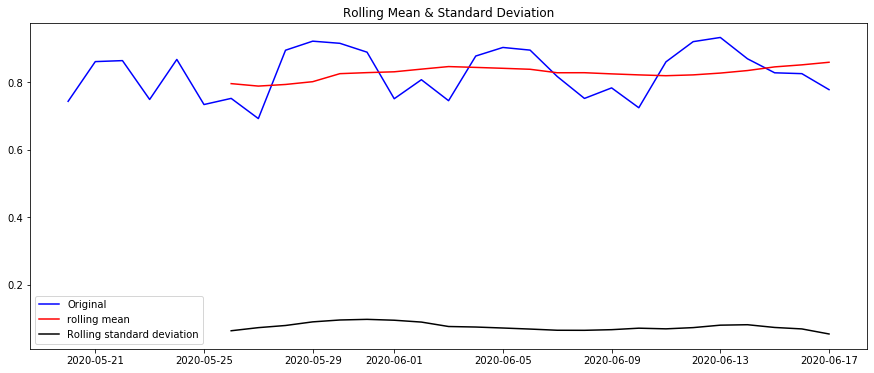

Results of Dickey-Fuller Test:
Test Statistic                 -1.915455
p-value                         0.324826
#Lags Used                      9.000000
Number of Observations Used    19.000000
Critical value (1%)            -3.832603
Critical value (5%)            -3.031227
Critical value (10%)           -2.655520
dtype: float64


In [142]:
test_stationarity(res['DELIVERY_RATE'])

##### 平滑

In [144]:
ts_log_moving_avg_diff = np.log(res['DELIVERY_RATE']) - np.log(res['DELIVERY_RATE']).rolling(window=7,center=False).mean()
ts_log_moving_avg_diff.dropna(inplace = True)

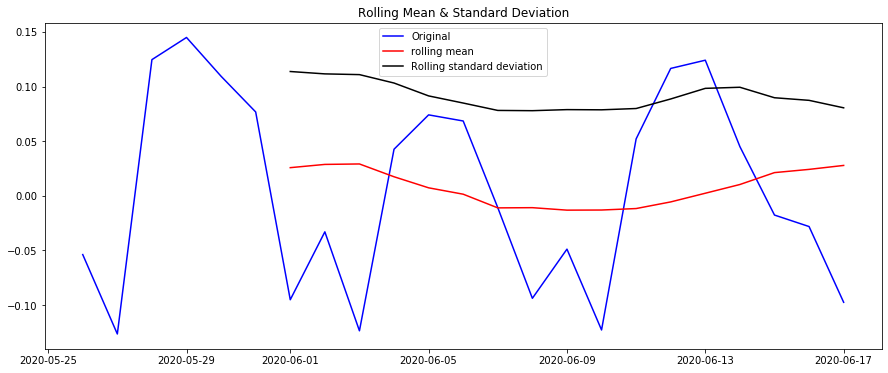

Results of Dickey-Fuller Test:
Test Statistic                -1.083613e+01
p-value                        1.660290e-19
#Lags Used                     9.000000e+00
Number of Observations Used    1.300000e+01
Critical value (1%)           -4.068854e+00
Critical value (5%)           -3.127149e+00
Critical value (10%)          -2.701730e+00
dtype: float64


In [145]:
test_stationarity(ts_log_moving_avg_diff)

##### 指数加权平均法

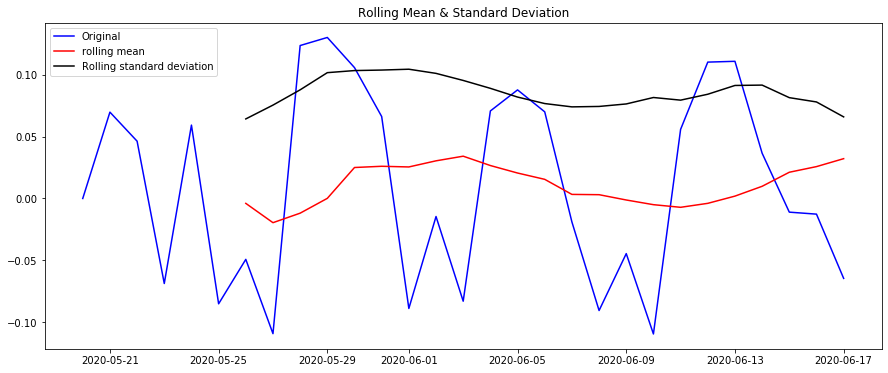

Results of Dickey-Fuller Test:
Test Statistic                 -2.508611
p-value                         0.113393
#Lags Used                      9.000000
Number of Observations Used    19.000000
Critical value (1%)            -3.832603
Critical value (5%)            -3.031227
Critical value (10%)           -2.655520
dtype: float64


In [146]:
expwighted_avg = np.log(res['DELIVERY_RATE']).ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
ts_log_ewma_diff = np.log(res['DELIVERY_RATE']) - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [232]:
# ts_log_ewma_diff

##### Differencing--差分

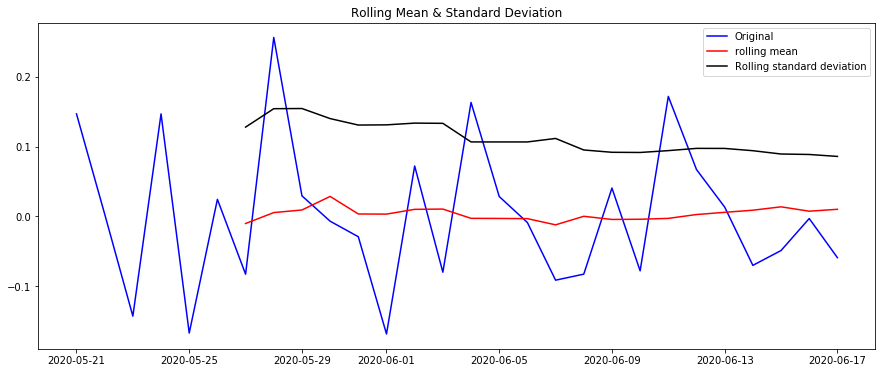

Results of Dickey-Fuller Test:
Test Statistic                 -2.187676
p-value                         0.210749
#Lags Used                      9.000000
Number of Observations Used    18.000000
Critical value (1%)            -3.859073
Critical value (5%)            -3.042046
Critical value (10%)           -2.660906
dtype: float64


In [147]:
ts_log_diff = np.log(res['DELIVERY_RATE']) - np.log(res['DELIVERY_RATE']).shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

##### 聚合-取一段时间的平均值（月/周平均值）

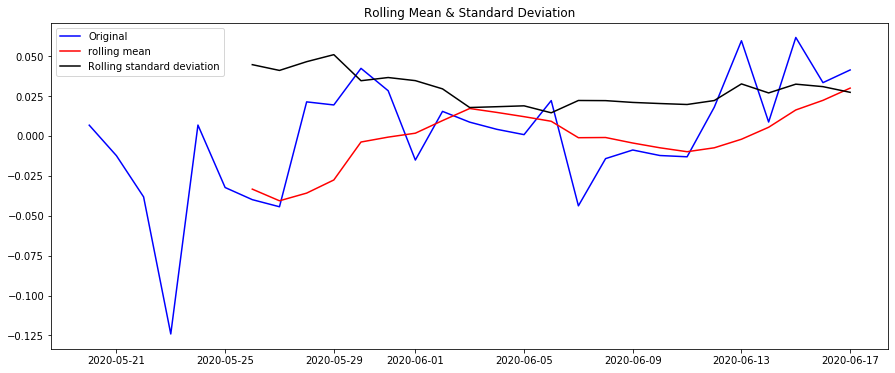

Results of Dickey-Fuller Test:
Test Statistic                 -3.408227
p-value                         0.010682
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical value (1%)            -3.688926
Critical value (5%)            -2.971989
Critical value (10%)           -2.625296
dtype: float64


In [174]:
res['SEND_W'] = res['SEND_DT'].apply(lambda dates: pd.datetime.strftime(dates, '%w'))
grouped=res['DELIVERY_RATE'].groupby(res['SEND_W']).mean()
grouped.rename(columns={"SEND_W":"mean_of_value"},inplace=True)
gp = pd.DataFrame(grouped.values, columns=['mean_of_value'], index=grouped.index)
res1 = res.join(gp, on=res.SEND_W)
tsav = res1['DELIVERY_RATE'] - res1['mean_of_value']
test_stationarity(tsav)

In [231]:
# tsav

#### Decomposing-分解

In [109]:
# 分解(decomposing) 可以用来把时序数据中的趋势和周期性数据都分离出来:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
#rcParams设定好画布的大小
rcParams['figure.figsize'] = 15, 6
def decompose(timeseries):
    
    # 返回包含三个部分 trend（趋势部分） ， seasonal（季节性部分） 和residual (残留部分)
    decomposition = seasonal_decompose(timeseries)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return trend , seasonal, residual

NameError: name 'test_stationarity' is not defined

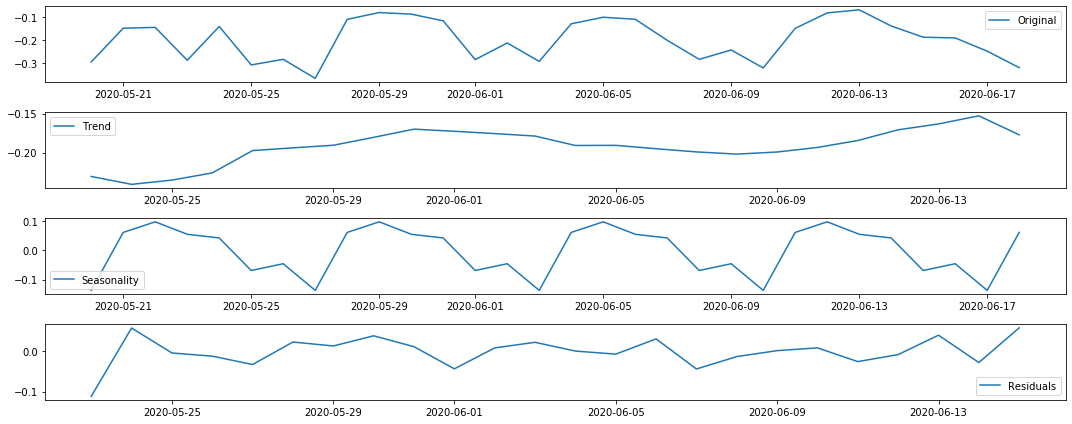

In [110]:
#消除了trend 和seasonal之后，只对residual部分作为想要的时序数据进行处理
trend , seasonal, residual = decompose(np.log(res['DELIVERY_RATE']))
residual.dropna(inplace=True)
test_stationarity(residual)
# res.set_index(res.SEND_DT, inplace=True)
# res
# decomposition = seasonal_decompose(np.log(res['DELIVERY_RATE']))

#### Predict

D:\Program\miniconda\envs\py36_32\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



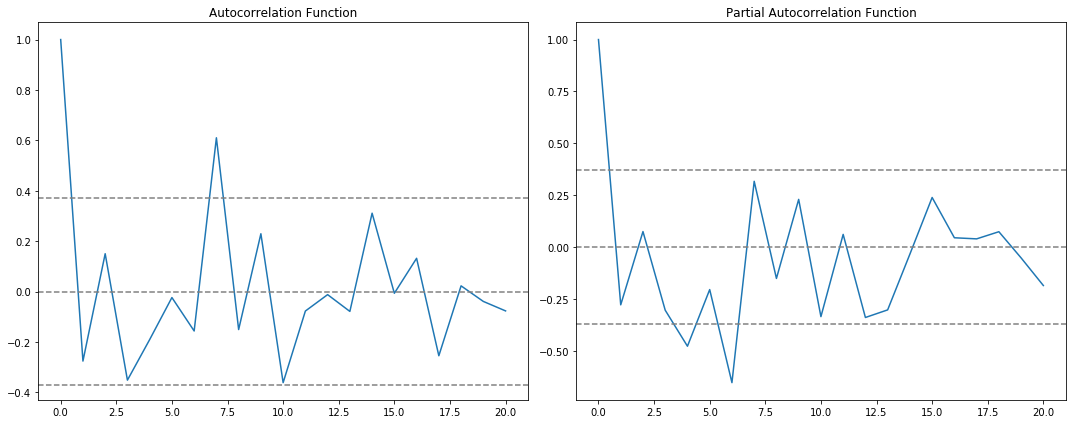

In [150]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

D:\Program\miniconda\envs\py36_32\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



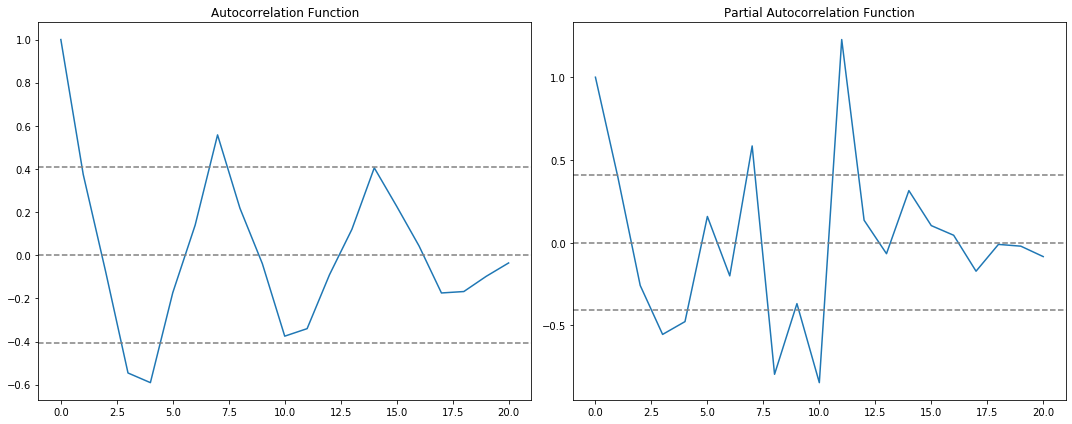

In [184]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_moving_avg_diff, nlags=20)
lag_pacf = pacf(ts_log_moving_avg_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### Fit

##### 模型1：AR模型(ARIMA(2,1,0))

D:\Program\miniconda\envs\py36_32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

D:\Program\miniconda\envs\py36_32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Text(0.5, 1.0, 'RSS: 0.0649')

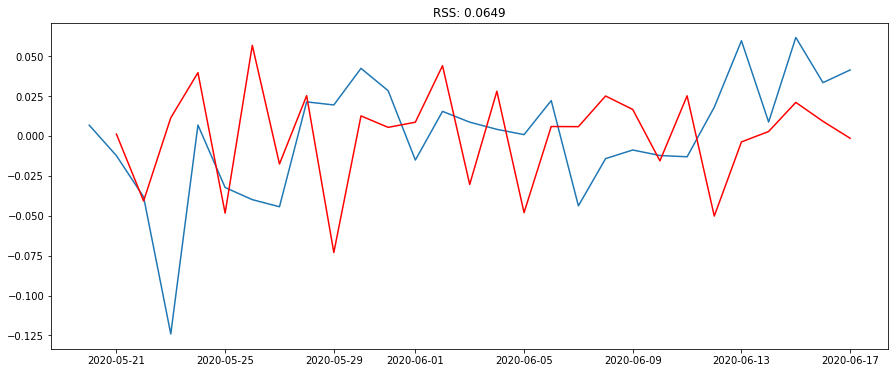

In [228]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(tsav)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-tsav).dropna()**2))

In [219]:
sum((results_AR.fittedvalues-tsav).dropna()**2)

0.08613504128268569

##### 模型2：MA模型（ARIMA（0,1,2)）

D:\Program\miniconda\envs\py36_32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

D:\Program\miniconda\envs\py36_32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Text(0.5, 1.0, 'RSS: 0.1553')

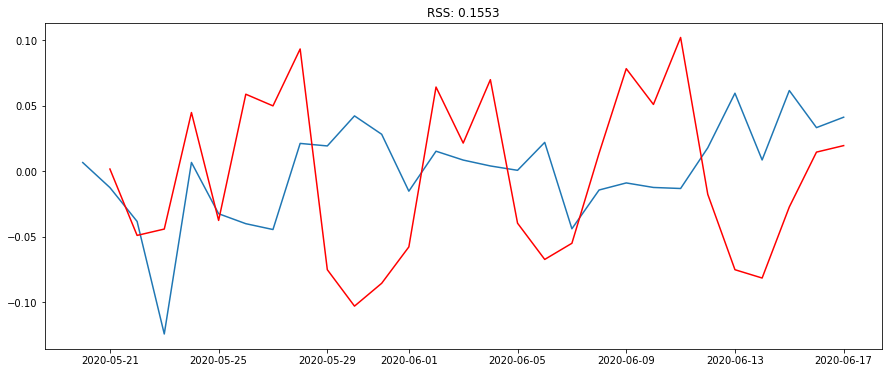

In [223]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(tsav)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-tsav).dropna()**2))

##### 模型3：ARIMA模型(ARIMA(2,1,2))

D:\Program\miniconda\envs\py36_32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Program\miniconda\envs\py36_32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0659')

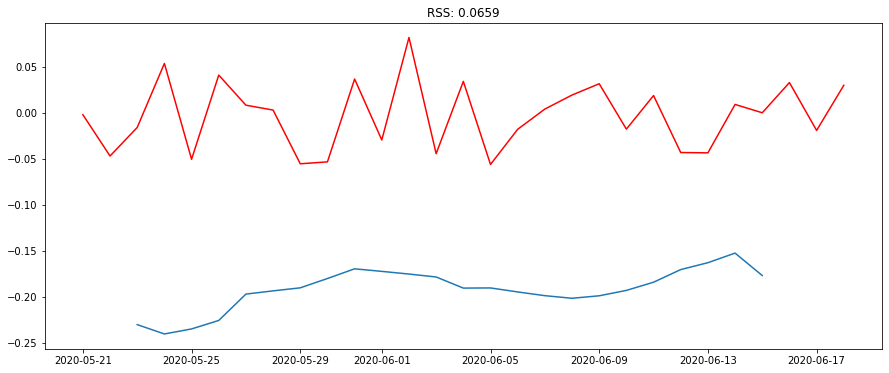

In [175]:
model = ARIMA(ts_log, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(trend)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-residual).dropna()**2))

##### 将模型代入原数据进行预测

SEND_DT
2020-05-21   -0.002334
2020-05-22   -0.047259
2020-05-23   -0.016211
2020-05-24    0.053352
2020-05-25   -0.050813
dtype: float64


Text(0.5, 1.0, 'RMSE: 0.1578')

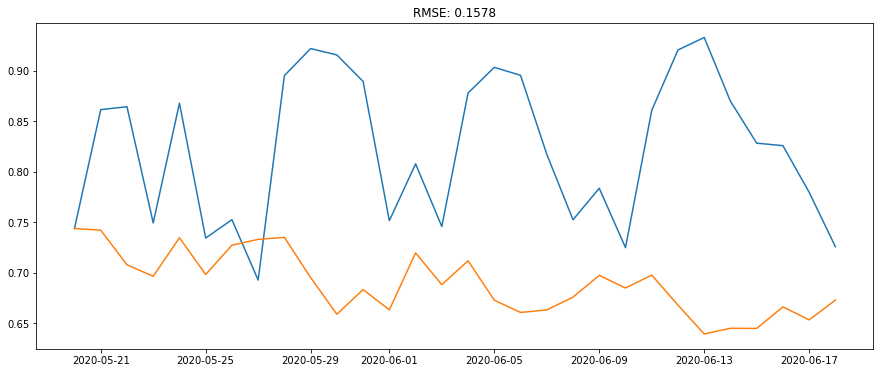

In [176]:
#ARIMA拟合的其实是一阶差分ts_log_diff，predictions_ARIMA_diff[i]是第i个月与i-1个月的ts_log的差值。
#由于差分化有一阶滞后，所以第一个月的数据是空的，
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())
#累加现有的diff，得到每个值与第一个月的差分（同log底的情况下）。
#即predictions_ARIMA_diff_cumsum[i] 是第i个月与第1个月的ts_log的差值。
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#先ts_log_diff => ts_log=>ts_log => ts 
#先以ts_log的第一个值作为基数，复制给所有值，然后每个时刻的值累加与第一个月对应的差值(这样就解决了，第一个月diff数据为空的问题了)
#然后得到了predictions_ARIMA_log => predictions_ARIMA
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure()
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [186]:
# quantitativeTrendAnalysis.predict(predictions_ARIMA)
quantitativeTrendAnalysis.predict(trend.dropna())

0.12251164858018065

#### pyecharts

In [114]:
# from pyecharts.globals import CurrentConfig, NotebookType
# CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
from pyecharts.charts import Line, Bar
from pyecharts.render import make_snapshot
from pyecharts.globals import ThemeType,RenderType
from pyecharts.options.series_options import TextStyleOpts
from pyecharts.commons.utils import JsCode
from pyecharts import options as opts
# 使用 snapshot-selenium 渲染图片
from snapshot_selenium import snapshot

In [121]:
line = (Line(init_opts = opts.InitOpts(width = "1000px", 
                                       height = "600px",
#                                        bg_color = "#ffffff",
                                       theme=ThemeType.VINTAGE, 
                                       renderer = RenderType.CANVAS, 
                                       animation_opts = opts.AnimationOpts(animation = True)
                                      )
            )
        .add_xaxis([i for i in pd.to_datetime(res.SEND_DT,format="%Y/%m/%d")])
        .add_yaxis("SMS", res['DELIVERY_RATE'])
#         .add_yaxis("Rolling Mean", rolling_log_diff_mean)
        .add_yaxis("predictions_ARIMA", predictions_ARIMA)
        .set_global_opts(title_opts = opts.TitleOpts(title = "Success Rate Trend", 
                                                     pos_left = 'center', 
                                                     pos_top = '1%',
                                                     title_textstyle_opts = {'fontWeight': 'bold',
                                                                             'fontSize': 16,
                                                                             'padding': [8,8,8,8],
                                                                             'hight': '10%',
                                                                             'line_height':'10%'}
                         ),
                         legend_opts = opts.LegendOpts(type_ = 'scroll', 
                                                       is_show = True,
                                                       pos_left = 'center', 
                                                       pos_top = 'bottom', 
                                                       orient = 'horizontal', 
                        ),
                        yaxis_opts = opts.AxisOpts(type_ = 'value',
#                                                    boundary_gap = ['0%','20%'],
#                                                    axislabel_opts = opts.LabelOpts(is_show = True,
#                                                                                    formatter = JsCode("function(params) \
#                                                                                    {var str = Number(params.value[1]/params.value[1]*100).toFixed(2) + '%'; return str;}"))
                        ),
#                          xaxis_opts = opts.AxisOpts(type_ = None, 
#                                                     boundary_gap = ['10%','10%']
#                                                    ),
                         toolbox_opts = opts.ToolboxOpts(is_show = True),
                         tooltip_opts = opts.TooltipOpts(is_show = True),
#                          datazoom_opts = opts.DataZoomOpts(is_show = True,
#                                                            type_ = "slider",
#                                                            orient = "vertical",
#                                                            range_start = 60,
#                                                            range_end = 100,
# #                                                            yaxis_index = 0
#                                                            )
                        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show = False,
#                                                    font_style="italic",
                                                   font_size = 15,
                                                   color = "#333333",
                                                   interval = 6, 
                                                   margin = 100,
                                                   formatter = JsCode(f"function(params){{ \
                                                   var str1= Number(params.value[1] * 100).toFixed(2) + '%'; \
                                                   return str1 }}"),
                                                   rich = {
                                                       'lineHeight':10
                                                   }
                                                  ),
                        )
)

In [122]:
line.render_notebook()

In [125]:
make_snapshot(snapshot, line.render(), "test.png")
# line.

#### plotly

In [6]:
import plotly.express as px

In [11]:
fig = px.line(res, y="DELIVERY_RATE", x="SEND_DT", color="CHANNEL", render_mode='svg')

In [12]:
fig.show()